In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importação dos pacotes e bibliotecas e leitura do dataset reduzido.

---



In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
spark = (
    SparkSession.builder
    .master('local')
    .appName('Pyspark')
    .getOrCreate()
)

In [ ]:
# prompt: para deszipar um arquivo

import zipfile

# Caminho para o arquivo zip
zip_file_path = '/content/drive/MyDrive/projeto_integrador/sisvan_estado_nutricional_2022.zip'

# Caminho para a pasta onde os arquivos serão extraídos
extract_path = '/content/drive/MyDrive/projeto_integrador'

# Abre o arquivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extrai todos os arquivos para a pasta de destino
    zip_ref.extractall(extract_path)

print(f'Arquivo {zip_file_path} descompactado com sucesso em {extract_path}.')

Arquivo /content/drive/MyDrive/projeto_integrador/sisvan_estado_nutricional_2022.zip descompactado com sucesso em /content/drive/MyDrive/projeto_integrador.


In [ ]:
df = spark.read.csv(r"/content/drive/MyDrive/projeto_integrador/sisvan_estado_nutricional_2022.csv", sep=';', header=True)


In [ ]:
df_novo = df.filter(col("NU_FASE_VIDA").isin('1.0','2.0','3.0','4.0','5.0'))

In [ ]:
df_novo = df_novo.filter(col("SG_UF").isin('BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE', 'AL'))

In [ ]:
df_novo.write.parquet(r"caminhoparasalvar/df_novo.parquet")

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diretorio = r"/content/drive/MyDrive/projeto_integrador/df_novo.parquet"
arquivos_parquet = glob.glob(os.path.join(diretorio, '*.parquet'))



In [ ]:
df = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos_parquet])
df.head()

,CO_ACOMPANHAMENTO,CO_PESSOA_SISVAN,ST_PARTICIPA_ANDI,CO_MUNICIPIO_IBGE,SG_UF,NO_MUNICIPIO,CO_CNES,NU_IDADE_ANO,NU_FASE_VIDA,DS_FASE_VIDA,...,PESO X ALTURA,CRI. ALTURA X IDADE,CRI. IMC X IDADE,ADO. ALTURA X IDADE,ADO. IMC X IDADE,CO_ESTADO_NUTRI_ADULTO,CO_ESTADO_NUTRI_IDOSO,CO_ESTADO_NUTRI_IMC_SEMGEST,CO_SISTEMA_ORIGEM_ACOMP,SISTEMA_ORIGEM_ACOMP
0,4F4E28BC37315767A96D44BD1E8DCBC08E2CADDD,C8C955AE62152ACA6AE4638A80BEA8DBBA3F9A97,None,292510,BA,POCOES,2556855,8,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB
1,B23EF32106A09F2903449D351B264BD748F9E180,C10636171A5E0535AF7D2450F2787C724B34F329,None,210317,MA,CENTRO NOVO DO MARANHAO,2311151,9,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB
2,1C4ADE734F163310B01395D22BAB00A4D96FC327,7C08F18291C5B26EAD8EA37B6EA46F7F3A8A7C69,None,260890,PE,LIMOEIRO,2350513,9,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB
3,1F6F7AB36C15A2AFD023792AF84A66BC07CF9F74,0D3EBC036B1B2623E936C063B1E8EDBB7A9E815F,None,250800,PB,JURU,7284276,8,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB
4,603287082D9A73A20CE21E33E0F4E895DEE64F4F,48BEEB4F6F69745E5CE0CAC56BFCFFAF0BA473C8,None,270310,AL,IGACI,2007576,9,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB


#Primeiras impressões do dataset
#### * Contagem de linhas e colunas
#### * Identificação dos tipos dos dados
#### * Verificação de valores duplicados
#### * Contagem de nulos

In [ ]:
print(f'O dataset reduzido, antes do tratamento, tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset reduzido, antes do tratamento, tem 4041463 linhas e 34 colunas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041463 entries, 0 to 4041462
Data columns (total 34 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   CO_ACOMPANHAMENTO            object
 1   CO_PESSOA_SISVAN             object
 2   ST_PARTICIPA_ANDI            object
 3   CO_MUNICIPIO_IBGE            object
 4   SG_UF                        object
 5   NO_MUNICIPIO                 object
 6   CO_CNES                      object
 7   NU_IDADE_ANO                 object
 8   NU_FASE_VIDA                 object
 9   DS_FASE_VIDA                 object
 10  SG_SEXO                      object
 11  CO_RACA_COR                  object
 12  DS_RACA_COR                  object
 13  CO_POVO_COMUNIDADE           object
 14  DS_POVO_COMUNIDADE           object
 15  CO_ESCOLARIDADE              object
 16  DS_ESCOLARIDADE              object
 17  DT_ACOMPANHAMENTO            object
 18  NU_COMPETENCIA               object
 19  NU_PESO              

#### Como todos os dados são do tipo object, vamos precisar converter na etapa de tratamento do dataset alguns deles para tipos numéricos (como os dados de peso, idade e altura).

In [ ]:
#Verificando se há dados duplicados (não há)
df.duplicated().sum()

0

#### Vamos contar o número de nulos de cada coluna. Para isso, criamos a função **proporcao_de_nulos()**, que retorna a porcentagem de valores nulos de cada atributo.  

In [ ]:
df['PESO X ALTURA'].isnull().sum()

1820677

In [ ]:
df.columns

Index(['CO_ACOMPANHAMENTO', 'CO_PESSOA_SISVAN', 'ST_PARTICIPA_ANDI',
       'CO_MUNICIPIO_IBGE', 'SG_UF', 'NO_MUNICIPIO', 'CO_CNES', 'NU_IDADE_ANO',
       'NU_FASE_VIDA', 'DS_FASE_VIDA', 'SG_SEXO', 'CO_RACA_COR', 'DS_RACA_COR',
       'CO_POVO_COMUNIDADE', 'DS_POVO_COMUNIDADE', 'CO_ESCOLARIDADE',
       'DS_ESCOLARIDADE', 'DT_ACOMPANHAMENTO', 'NU_COMPETENCIA', 'NU_PESO',
       'NU_ALTURA', 'DS_IMC', 'DS_IMC_PRE_GESTACIONAL', 'PESO X IDADE',
       'PESO X ALTURA', 'CRI. ALTURA X IDADE', 'CRI. IMC X IDADE',
       'ADO. ALTURA X IDADE', 'ADO. IMC X IDADE', 'CO_ESTADO_NUTRI_ADULTO',
       'CO_ESTADO_NUTRI_IDOSO', 'CO_ESTADO_NUTRI_IMC_SEMGEST',
       'CO_SISTEMA_ORIGEM_ACOMP', 'SISTEMA_ORIGEM_ACOMP'],
      dtype='object')

In [ ]:
def proporcao_de_nulos(df):
  colunas = df.columns
  for col in colunas:
    nulos = df[col].isnull().sum() #conta o número de nulos a cada iteração
    proporcao = nulos/len(df)
    if round(proporcao * 100, 2) > 0:
        print(f'A coluna {col} apresenta {round(proporcao * 100, 2)}% de nulos.')


In [ ]:
proporcao_de_nulos(df)

A coluna ST_PARTICIPA_ANDI apresenta 100.0% de nulos.
A coluna CO_CNES apresenta 0.43% de nulos.
A coluna CO_POVO_COMUNIDADE apresenta 99.85% de nulos.
A coluna CO_ESCOLARIDADE apresenta 76.31% de nulos.
A coluna DS_IMC_PRE_GESTACIONAL apresenta 100.0% de nulos.
A coluna PESO X ALTURA apresenta 45.05% de nulos.
A coluna CRI. ALTURA X IDADE apresenta 0.01% de nulos.
A coluna ADO. ALTURA X IDADE apresenta 100.0% de nulos.
A coluna ADO. IMC X IDADE apresenta 100.0% de nulos.
A coluna CO_ESTADO_NUTRI_ADULTO apresenta 100.0% de nulos.
A coluna CO_ESTADO_NUTRI_IDOSO apresenta 100.0% de nulos.
A coluna CO_ESTADO_NUTRI_IMC_SEMGEST apresenta 100.0% de nulos.


#### Verificamos que colunas que já não eram interessantes para a nossa análise (como as que trazem dados da população adulta, idosa e adolescente) apresentam 100% de dados vazios. Portanto, não há motivos para mantê-las no nosso dataset.
#### No entando, identificamos um ponto de atenção: a coluna "PESO X ALTURA", que contém dados interessantes para a nossa análise, apresenta quase metade dos dados nulos (45%). Diante disso, precisaremos decidir se vamos descartar a coluna ou mantê-la, mas suprimindo as entradas que contêm valores nulos.

# Tratamento do dataset
## Nesta etapa vamos fazer os seguintes ajustes:
#### * Excluir colunas e linhas desnecessárias para a nossa análise
#### * Converter os tipos dos dados, quando necessário
#### * Renomear as colunas



In [ ]:
df.columns


Index(['CO_ACOMPANHAMENTO', 'CO_PESSOA_SISVAN', 'ST_PARTICIPA_ANDI',
       'CO_MUNICIPIO_IBGE', 'SG_UF', 'NO_MUNICIPIO', 'CO_CNES', 'NU_IDADE_ANO',
       'NU_FASE_VIDA', 'DS_FASE_VIDA', 'SG_SEXO', 'CO_RACA_COR', 'DS_RACA_COR',
       'CO_POVO_COMUNIDADE', 'DS_POVO_COMUNIDADE', 'CO_ESCOLARIDADE',
       'DS_ESCOLARIDADE', 'DT_ACOMPANHAMENTO', 'NU_COMPETENCIA', 'NU_PESO',
       'NU_ALTURA', 'DS_IMC', 'DS_IMC_PRE_GESTACIONAL', 'PESO X IDADE',
       'PESO X ALTURA', 'CRI. ALTURA X IDADE', 'CRI. IMC X IDADE',
       'ADO. ALTURA X IDADE', 'ADO. IMC X IDADE', 'CO_ESTADO_NUTRI_ADULTO',
       'CO_ESTADO_NUTRI_IDOSO', 'CO_ESTADO_NUTRI_IMC_SEMGEST',
       'CO_SISTEMA_ORIGEM_ACOMP', 'SISTEMA_ORIGEM_ACOMP'],
      dtype='object')

In [ ]:
df_limpa = df.drop(['CO_ACOMPANHAMENTO','DT_ACOMPANHAMENTO', 'NU_COMPETENCIA','CO_PESSOA_SISVAN', 'CO_MUNICIPIO_IBGE', 'CO_CNES', 'CO_RACA_COR', 'CO_POVO_COMUNIDADE', 'DS_POVO_COMUNIDADE','CO_ESCOLARIDADE',
       'DS_ESCOLARIDADE', 'ADO. ALTURA X IDADE', 'ADO. IMC X IDADE', 'CO_ESTADO_NUTRI_ADULTO',
       'CO_ESTADO_NUTRI_IDOSO', 'CO_ESTADO_NUTRI_IMC_SEMGEST','NU_FASE_VIDA',
       'CO_SISTEMA_ORIGEM_ACOMP', 'SISTEMA_ORIGEM_ACOMP', 'DS_IMC_PRE_GESTACIONAL', 'ST_PARTICIPA_ANDI'], axis = 1)

In [ ]:
df_limpa.head()

,SG_UF,NO_MUNICIPIO,NU_IDADE_ANO,DS_FASE_VIDA,SG_SEXO,DS_RACA_COR,NU_PESO,NU_ALTURA,DS_IMC,PESO X IDADE,PESO X ALTURA,CRI. ALTURA X IDADE,CRI. IMC X IDADE
0,BA,POCOES,8,ENTRE 7 ANOS A 10 ANOS,M,PARDA,27,"133,5","15,15",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia
1,MA,CENTRO NOVO DO MARANHAO,9,ENTRE 7 ANOS A 10 ANOS,F,PARDA,"23,8",126,"14,99",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia
2,PE,LIMOEIRO,9,ENTRE 7 ANOS A 10 ANOS,M,BRANCA,26,137,"13,85",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia
3,PB,JURU,8,ENTRE 7 ANOS A 10 ANOS,F,BRANCA,"21,4",125,"13,7",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia
4,AL,IGACI,9,ENTRE 7 ANOS A 10 ANOS,M,PARDA,"26,5",124,"17,23",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia


### Como vamos considerar na nossa análise apenas as crianças de 0 a 6 anos, vamos eliminar as linhas correspondentes às crianças com mais de 6 anos.

In [ ]:
#Verificando os valores únicos da coluna que traz as faixas etárias existentes no dataset

df_limpa['DS_FASE_VIDA'].unique()

array(['ENTRE 7 ANOS A 10 ANOS', 'ENTRE 2 ANOS A 5 ANOS',
       'ENTRE 6 MESES A 2 ANOS', 'MENOR DE 6 MESES',
       'ENTRE 5 ANOS A 7 ANOS'], dtype=object)

In [ ]:
#Excluindo as linhas referentes a crianças com idade maior que 6 anos
df_limpa = df_limpa[df_limpa['DS_FASE_VIDA'] != 'ENTRE 7 ANOS A 10 ANOS']


## Conversão dos tipos dos dados

In [ ]:
df_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117647 entries, 5 to 4041462
Data columns (total 13 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SG_UF                object
 1   NO_MUNICIPIO         object
 2   NU_IDADE_ANO         object
 3   DS_FASE_VIDA         object
 4   SG_SEXO              object
 5   DS_RACA_COR          object
 6   NU_PESO              object
 7   NU_ALTURA            object
 8   DS_IMC               object
 9   PESO X IDADE         object
 10  PESO X ALTURA        object
 11  CRI. ALTURA X IDADE  object
 12  CRI. IMC X IDADE     object
dtypes: object(13)
memory usage: 333.0+ MB


In [ ]:
df_limpa[['NU_PESO', 'DS_IMC', 'NU_ALTURA']]
#As colunas que trazem os dados referentes ao peso, IMC e à altura das pessoas devem ser convertidas para o tipo float, mas antes da conversão vamos precisar substituir as vírgulas das casas decimais por ponto.

,NU_PESO,DS_IMC,NU_ALTURA
5,"13,5","15,95",92
8,17,17,100
9,"16,5","18,67",94
10,"11,2","14,46",88
12,13,"16,05",90
...,...,...,...
4041458,"16,4","15,38",102
4041459,"18,4","14,35",112
4041460,18,"14,88",110
4041461,15,"12,86",108


In [ ]:
#Fazendo a substituição das vírgulas por ponto
for col in ['NU_PESO', 'DS_IMC', 'NU_ALTURA']:
    df_limpa[col] = df_limpa[col].str.replace(',', '.')

In [ ]:
#Conferindo se a substituição de "," por "." foi feita

df_limpa[['NU_PESO', 'DS_IMC', 'NU_ALTURA']]

,NU_PESO,DS_IMC,NU_ALTURA
5,13.5,15.95,92
8,17,17,100
9,16.5,18.67,94
10,11.2,14.46,88
12,13,16.05,90
...,...,...,...
4041458,16.4,15.38,102
4041459,18.4,14.35,112
4041460,18,14.88,110
4041461,15,12.86,108


In [ ]:
#Convertendo as colunas para o tipo float

for col in ['NU_PESO', 'DS_IMC', 'NU_ALTURA']:
  df_limpa[col] = df_limpa[col].astype(float)

In [ ]:
#Convertendo a coluna das idades para o tipo int

df_limpa['NU_IDADE_ANO'] = df_limpa['NU_IDADE_ANO'].astype(int)

In [ ]:
#Verificando se a conversão foi feita

df_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117647 entries, 5 to 4041462
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   SG_UF                object 
 1   NO_MUNICIPIO         object 
 2   NU_IDADE_ANO         int64  
 3   DS_FASE_VIDA         object 
 4   SG_SEXO              object 
 5   DS_RACA_COR          object 
 6   NU_PESO              float64
 7   NU_ALTURA            float64
 8   DS_IMC               float64
 9   PESO X IDADE         object 
 10  PESO X ALTURA        object 
 11  CRI. ALTURA X IDADE  object 
 12  CRI. IMC X IDADE     object 
dtypes: float64(3), int64(1), object(9)
memory usage: 333.0+ MB


## Renomeando as colunas com títulos mais claros e informativos

In [ ]:
novas_colunas = ['UF', 'Município', 'Idade', 'Fase_da_vida', 'Gênero', 'Cor', 'Peso',
                 'Altura', 'IMC', 'Estado_nutricional_de peso_para_idade', 'Estado_nutricional_de_peso', 'Estado_nutricional_de_altura_para_idade',
                 'Estado_nutricional_de_IMC_para_idade']
df_limpa.columns = novas_colunas
df_limpa.head()

,UF,Município,Idade,Fase_da_vida,Gênero,Cor,Peso,Altura,IMC,Estado_nutricional_de peso_para_idade,Estado_nutricional_de_peso,Estado_nutricional_de_altura_para_idade,Estado_nutricional_de_IMC_para_idade
5,MA,PACO DO LUMIAR,2,ENTRE 2 ANOS A 5 ANOS,M,PARDA,13.5,92.0,15.95,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
8,PI,CABECEIRAS DO PIAUI,2,ENTRE 2 ANOS A 5 ANOS,F,AMARELA,17.0,100.0,17.00,Peso adequado para idade,Risco de sobrepeso,Estatura adequada para a idade,Risco de sobrepeso
9,CE,FORTALEZA,2,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,16.5,94.0,18.67,Peso adequado para idade,Sobrepeso,Estatura adequada para a idade,Sobrepeso
10,BA,CONDEUBA,2,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,11.2,88.0,14.46,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
12,PI,CAMPO MAIOR,1,ENTRE 6 MESES A 2 ANOS,F,AMARELA,13.0,90.0,16.05,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia


In [ ]:
#Consultando os tipos únicos de cada coluna

for col in df_limpa.columns:
  print(f'Coluna: {col}')
  print(df_limpa[col].unique())
  print("-" * 30)

Coluna: UF
['MA' 'PI' 'CE' 'BA' 'PE' 'AL' 'RN' 'PB' 'SE']
------------------------------
Coluna: Município
['PACO DO LUMIAR' 'CABECEIRAS DO PIAUI' 'FORTALEZA' ...
 'SAO LUIS DO PIAUI' 'MURICI DOS PORTELAS' 'CANHOBA']
------------------------------
Coluna: Idade
[2 1 4 3 0 5 6]
------------------------------
Coluna: Fase_da_vida
['ENTRE 2 ANOS A 5 ANOS' 'ENTRE 6 MESES A 2 ANOS' 'MENOR DE 6 MESES'
 'ENTRE 5 ANOS A 7 ANOS']
------------------------------
Coluna: Gênero
['M' 'F']
------------------------------
Coluna: Cor
['PARDA' 'AMARELA' 'BRANCA' 'SEM INFORMACAO' 'PRETA' 'INDIGENA']
------------------------------
Coluna: Peso
[13.5   17.    16.5   ... 21.962 27.584  3.842]
------------------------------
Coluna: Altura
[ 92.  100.   94.  ...  14.2 151.5  19.3]
------------------------------
Coluna: IMC
[15.95 17.   18.67 ... 97.22 57.31 38.33]
------------------------------
Coluna: Estado_nutricional_de peso_para_idade
['Peso adequado para idade' 'Peso elevado para a idade'
 'Baixo peso 

####Ponto de atenção: Consultando os tipos únicos de cada variável, percebemos que o atributo "Cor", embora não tenha revelado nenhum dado nulo quando usamos o método isnull() para identificá-los anteriormente, apresenta dados "SEM INFORMAÇÃO". Como é um atributo importante para a nossa proposta analítica, vamos descobrir a proporção de ocorrências desta coluna para analisar se é viável utilizá-la.

In [ ]:
proporcao_de_dados_sem_informacao = (df_limpa[df_limpa['Cor'] == 'SEM INFORMACAO'].shape[0])/(df_limpa.shape[0])
proporcao_de_dados_sem_informacao

0.10222613400426668

#### Como apenas 10,2% dos dados não foram informados, esta coluna continua sendo relevante para a nossa análise.

## Recontando os nulos depois das transformações realizadas...

In [ ]:
proporcao_de_nulos(df_limpa)


A coluna Estado_nutricional_de peso_para_idade apresenta 0.01% de nulos.
A coluna Estado_nutricional_de_peso apresenta 28.77% de nulos.
A coluna Estado_nutricional_de_altura_para_idade apresenta 0.01% de nulos.


#### Após a exclusão das linhas correspondentes à faixa etária de 7 a 10 anos, a coluna "Estado_nutricional_de_peso" (antiga "PESO X ALTURA") passou a apresentar 28,77% de dados nulos. Uma proporção mais razoável, que não impede a análise.

In [ ]:
#Atualizando número de linhas e colunas após o tratamento
print(f'O dataset atualizado, após a eliminação das colunas e linhas desnecessárias, tem {df_limpa.shape[0]} linhas e {df_limpa.shape[1]} colunas.')

O dataset atualizado, após a eliminação das colunas e linhas desnecessárias, tem 3117647 linhas e 13 colunas.


# Análises estatísticas

In [ ]:
#Usando o método describe.() para calcular as principais métricas das variáveis numéricas

df_limpa.describe(include=[np.number])

,Idade,Peso,Altura,IMC
count,3.117647e+06,3.117647e+06,3.117647e+06,3.117647e+06
mean,3.095513e+00,1.594682e+01,9.634900e+01,1.659699e+01
std,2.012918e+00,7.467062e+00,1.993684e+01,3.746392e+00
min,0.000000e+00,1.000000e-02,1.000000e-01,0.000000e+00
25%,1.000000e+00,1.120000e+01,8.200000e+01,1.461000e+01
50%,3.000000e+00,1.515000e+01,1.000000e+02,1.602000e+01
75%,5.000000e+00,1.950000e+01,1.110000e+02,1.795000e+01
max,6.000000e+00,9.800000e+02,9.970000e+02,1.681900e+02


In [ ]:
df_limpa.columns

Index(['UF', 'Município', 'Idade', 'Fase_da_vida', 'Gênero', 'Cor', 'Peso',
       'Altura', 'IMC', 'Estado_nutricional_de peso_para_idade',
       'Estado_nutricional_de_peso', 'Estado_nutricional_de_altura_para_idade',
       'Estado_nutricional_de_IMC_para_idade'],
      dtype='object')

In [ ]:
variaveis_numericas = df_limpa[['Idade', 'Peso', 'Altura', 'IMC']]

In [ ]:
variaveis_categoricas = df_limpa[['UF', 'Município','Fase_da_vida', 'Gênero','Cor','Estado_nutricional_de peso_para_idade', 'Estado_nutricional_de_peso',
       'Estado_nutricional_de_altura_para_idade','Estado_nutricional_de_IMC_para_idade']]

## Medidas de tendência central (média, moda e mediana) das variáveis numéricas

In [ ]:
print('MÉDIA', end = "\n\n")
print(variaveis_numericas.mean())
print('-'*40)
print('MODA', end = "\n\n")
print(variaveis_numericas.mode())
print('-'*40)
print('MEDIANA', end = "\n\n")
print(variaveis_numericas.median())

MÉDIA

Idade      3.095513
Peso      15.946816
Altura    96.348998
IMC       16.596988
dtype: float64
----------------------------------------
MODA

   Idade  Peso  Altura    IMC
0      6  15.0   110.0  14.88
----------------------------------------
MEDIANA

Idade       3.00
Peso       15.15
Altura    100.00
IMC        16.02
dtype: float64


##Valores máximos e mínimos

In [ ]:
print('VALOR MÁXIMO', end = "\n\n")
print(variaveis_numericas.max())
print('-'*40)
print('VALOR MÍNIMO', end = "\n\n")
print(variaveis_numericas.min())

VALOR MÁXIMO

Idade       6.00
Peso      980.00
Altura    997.00
IMC       168.19
dtype: float64
----------------------------------------
VALOR MÍNIMO

Idade     0.00
Peso      0.01
Altura    0.10
IMC       0.00
dtype: float64


## Medida de tendência central (moda) das variáveis categóricas

In [ ]:
print('MODA', end = "\n\n")
variaveis_categoricas.mode()

MODA



,UF,Município,Fase_da_vida,Gênero,Cor,Estado_nutricional_de peso_para_idade,Estado_nutricional_de_peso,Estado_nutricional_de_altura_para_idade,Estado_nutricional_de_IMC_para_idade
0,BA,FORTALEZA,ENTRE 2 ANOS A 5 ANOS,M,PARDA,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia


## Medidas de dispersão (desvio padrão, amplitude, variância e quartis) das variáveis numéricas



In [ ]:
for col in ['Peso', 'Idade', 'Altura', 'IMC']:
  variancia = np.var(df_limpa[col])
  print(f'Variância de {col}: {variancia:.2f}')

print('-'*60)

for col in ['Peso', 'Idade', 'Altura', 'IMC']:
  std = np.std(df_limpa[col])
  print(f'Desvio padrão de {col}: {std:.2f}')

print('-'*60)

for col in ['Peso', 'Idade', 'Altura', 'IMC']:
  amplitude = df_limpa[col].max() - df_limpa[col].min()
  print(f'Amplitude de {col}: {amplitude}')

print('-'*60)

for col in ['Peso', 'Idade', 'Altura', 'IMC']:
  q25, q50, q75 = np.quantile(df_limpa[col], 0.25), np.quantile(df_limpa[col], 0.50), np.quantile(df_limpa[col], 0.75)
  print(f'Os quartis de {col} são: primeiro quartil = {q25}, segundo quartil = {q50} e terceiro quartil = {q75}.')

Variância de Peso: 55.76
Variância de Idade: 4.05
Variância de Altura: 397.48
Variância de IMC: 14.04
------------------------------------------------------------
Desvio padrão de Peso: 7.47
Desvio padrão de Idade: 2.01
Desvio padrão de Altura: 19.94
Desvio padrão de IMC: 3.75
------------------------------------------------------------
Amplitude de Peso: 979.99
Amplitude de Idade: 6
Amplitude de Altura: 996.9
Amplitude de IMC: 168.19
------------------------------------------------------------
Os quartis de Peso são: primeiro quartil = 11.2, segundo quartil = 15.15 e terceiro quartil = 19.5.
Os quartis de Idade são: primeiro quartil = 1.0, segundo quartil = 3.0 e terceiro quartil = 5.0.
Os quartis de Altura são: primeiro quartil = 82.0, segundo quartil = 100.0 e terceiro quartil = 111.0.
Os quartis de IMC são: primeiro quartil = 14.61, segundo quartil = 16.02 e terceiro quartil = 17.95.


# Identificando anomalias

## Identificando outliers

####Obs: Segmentamos a população de crianças em faixas etárias para então procurar os outliers em cada uma delas. As faixas etárias são as seguintes:
#### * Faixa etária 1: Menor de 6 meses
#### * Faixa etária 2: Entre 6 meses a 2 anos
##### * Faixa etária 3: Entre 2 anos a 5 anos
#### * Faixa etária 4: Entre 5 anos a 7 anos





In [ ]:
faixa_etaria_1 = df_limpa[df_limpa['Fase_da_vida'] == 'MENOR DE 6 MESES']
faixa_etaria_2 = df_limpa[df_limpa['Fase_da_vida'] == 'ENTRE 6 MESES A 2 ANOS']
faixa_etaria_3 = df_limpa[df_limpa['Fase_da_vida'] == 'ENTRE 2 ANOS A 5 ANOS']
faixa_etaria_4 = df_limpa[df_limpa['Fase_da_vida'] == 'ENTRE 5 ANOS A 7 ANOS']


### Utilizando o método IQR

Decidimos aplicar o método IQR (o mais utilizado) para identificar os outliers. Este método se baseia nos intervalos interquartis e nos ajuda bastante e ter uma boa visão da dispersão dos dados. Criamos a função **identificador_de_outlier( )** para encontrar os pontos fora da curva das colunas do dataset. Ela executa os seguintes processos:
* Calcula o primeiro e o terceiro quartis (que é o primeiro passo da aplicação do método IQR)
* Calcula a diferença entre estes quartis (cujo valor corresponde ao **iqr**)
* Define os valores de corte máximo e mínimo de nossa métrica. Caso algum dado seja menor que o valor de corte mínimo ou maior que o valor de corte máximo, ele será classificado como outlier.
* Faz a iteração sobre a coluna especificada identificando os valores maiores o menores que os valores de corte estabelecidos, armazenando-os na lista **outliers**.
* Imprime os valores armazenados na lista **outliers** e a quantidade de elementos desta lista.



In [ ]:
def identificador_de_outlier(df, col):

    q1, q3 = np.quantile(df[col], 0.25), np.quantile(df[col], 0.75) # calcula o primeiro e o terceiro quartis
    iqr = q3 - q1  # calcula  IQR (Q3 - Q1)

    limite_inferior = q1 - (1.5 * iqr)
    limite_superior = q3 + (1.5 * iqr)

    outliers = [] # lista em que os outliers encontrados serão armazenados

    for i in df[col].values:
      if((i > limite_superior) or (i < limite_inferior)):
        outliers.append(i)
    print('Número de outliers encontrados', len(outliers))
    #print('Outliers:', outliers)


### Identificando outliers da variável "Peso"





In [ ]:
identificador_de_outlier(faixa_etaria_1, 'Peso')

Número de outliers encontrados 1402
Outliers: [11.4, 10.395, 11.0, 14.4, 10.49, 1.0, 10.9, 14.6, 1.0, 10.8, 11.78, 10.65, 1.0, 1.0, 1.0, 1.0, 22.0, 1.0, 10.83, 1.0, 1.0, 10.4, 1.0, 11.5, 10.48, 19.1, 1.0, 1.0, 1.0, 14.0, 12.5, 11.5, 10.5, 10.5, 10.605, 10.4, 10.6, 10.4, 13.5, 1.0, 1.0, 1.0, 1.0, 13.0, 1.0, 1.0, 13.0, 10.5, 10.9, 1.0, 1.0, 10.76, 10.7, 15.4, 20.0, 13.3, 1.0, 10.4, 1.0, 1.0, 1.0, 13.0, 1.0, 1.0, 1.0, 15.0, 10.6, 1.0, 1.0, 1.0, 10.6, 10.8, 1.0, 1.0, 1.0, 21.0, 11.8, 10.6, 10.4, 1.0, 1.0, 15.0, 13.0, 11.3, 1.0, 11.0, 1.0, 10.6, 10.6, 1.0, 10.76, 12.4, 10.4, 12.4, 1.0, 1.0, 1.17, 1.0, 1.0, 11.0, 20.0, 1.0, 1.0, 1.0, 1.0, 11.48, 21.0, 11.0, 1.0, 13.0, 13.0, 1.0, 12.0, 10.5, 11.7, 1.0, 11.0, 1.0, 1.0, 1.0, 11.4, 1.0, 14.0, 11.0, 10.43, 1.0, 1.0, 1.0, 1.0, 11.0, 11.1, 11.3, 16.2, 1.0, 20.0, 12.0, 10.7, 10.9, 11.0, 1.0, 18.0, 1.0, 15.9, 10.82, 1.0, 15.0, 1.0, 17.2, 1.0, 12.4, 10.9, 1.0, 1.0, 1.2, 1.0, 12.0, 1.0, 1.0, 11.5, 17.0, 11.0, 11.2, 14.5, 10.5, 10.4, 1.0, 12.0, 11.0, 1.

In [ ]:
identificador_de_outlier(faixa_etaria_2, 'Peso')

Número de outliers encontrados 20505
Outliers: [16.0, 15.7, 15.5, 15.7, 19.0, 4.2, 4.4, 4.9, 16.0, 17.0, 15.8, 4.0, 15.7, 16.8, 17.0, 15.7, 2.7, 18.0, 1.5, 20.3, 17.0, 1.0, 3.63, 4.956, 1.2, 17.8, 16.5, 4.84, 1.0, 5.0, 20.0, 4.5, 15.4, 16.3, 19.7, 4.5, 16.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 15.5, 16.0, 16.3, 16.0, 16.0, 1.0, 18.5, 15.4, 1.0, 1.0, 1.0, 1.0, 19.0, 3.186, 5.0, 1.0, 1.0, 1.0, 1.0, 17.0, 15.5, 16.2, 3.22, 18.0, 2.85, 15.7, 15.5, 16.0, 1.0, 15.6, 15.4, 19.0, 20.0, 16.0, 16.0, 4.4, 5.0, 23.0, 18.0, 15.9, 19.4, 16.8, 17.5, 19.0, 1.0, 15.7, 1.17, 19.4, 16.0, 1.0, 1.0, 18.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.615, 15.5, 17.0, 16.3, 15.6, 16.7, 18.2, 16.8, 17.0, 5.0, 5.0, 4.6, 3.75, 16.0, 1.05, 16.8, 15.8, 17.4, 16.0, 18.5, 4.045, 18.0, 0.9, 16.9, 15.7, 2.78, 1.0, 19.0, 4.0, 2.608, 3.65, 3.14, 4.0, 1.6, 17.0, 1.29, 4.785, 16.0, 24.0, 4.9, 5.0, 19.0, 3.6, 23.0, 4.9, 16.0, 23.0, 5.0, 4.0, 20.3, 19.0, 20.0, 16.0, 1.0, 4.0, 18.0, 18.1, 18.5, 16.0, 18.0, 1.0, 1.0, 1.0, 15.4, 1.0, 1.0, 1.0, 4.85,

In [ ]:
identificador_de_outlier(faixa_etaria_3, 'Peso')


Número de outliers encontrados 41163
Outliers: [31.5, 27.0, 30.0, 28.0, 26.8, 28.0, 26.0, 5.4, 27.0, 30.0, 33.0, 5.1, 26.8, 28.8, 34.0, 28.0, 27.1, 1.65, 4.4, 3.6, 5.9, 25.9, 5.965, 4.8, 2.0, 26.7, 31.0, 31.0, 1.1, 1.2, 28.0, 28.0, 34.0, 32.0, 28.7, 26.0, 1.0, 28.0, 28.2, 27.0, 26.4, 26.0, 35.5, 37.0, 35.0, 27.0, 28.0, 25.4, 28.0, 27.0, 29.0, 29.2, 28.0, 1.0, 35.7, 35.0, 1.0, 6.0, 30.6, 32.0, 1.1, 1.0, 26.0, 25.4, 26.0, 1.0, 33.0, 30.5, 29.7, 25.5, 34.0, 3.5, 29.0, 27.0, 31.5, 29.2, 26.3, 38.0, 31.9, 26.0, 1.0, 1.0, 27.2, 1.0, 1.0, 1.0, 30.0, 36.1, 25.4, 32.0, 3.5, 27.0, 27.5, 28.3, 26.2, 27.0, 35.0, 25.7, 31.0, 27.8, 39.4, 26.0, 29.0, 26.0, 26.0, 30.5, 28.8, 28.2, 27.0, 32.0, 35.0, 29.0, 25.5, 26.0, 1.5, 35.0, 2.2, 27.0, 28.0, 27.0, 29.0, 26.0, 6.0, 32.2, 5.3, 27.0, 40.0, 2.0, 35.8, 27.2, 27.0, 27.0, 38.0, 1.1, 28.6, 25.8, 30.0, 2.0, 28.0, 1.0, 1.0, 27.8, 29.0, 26.0, 1.3, 34.0, 38.0, 26.0, 29.9, 27.2, 27.0, 5.25, 28.0, 6.0, 38.5, 28.0, 1.3, 2.5, 26.0, 2.86, 29.0, 6.0, 32.0, 25.2, 3.5,

In [ ]:
identificador_de_outlier(faixa_etaria_4, 'Peso')

Número de outliers encontrados 49305
Outliers: [59.0, 34.0, 47.0, 36.3, 34.0, 43.0, 33.0, 33.0, 37.0, 43.0, 34.0, 34.3, 38.0, 41.2, 38.8, 45.9, 36.0, 35.5, 36.0, 8.5, 34.8, 39.7, 39.5, 34.0, 36.0, 35.0, 40.0, 33.9, 36.0, 72.0, 53.0, 42.9, 34.2, 41.6, 36.3, 38.5, 36.0, 35.0, 39.7, 35.8, 45.0, 36.0, 39.9, 40.1, 50.0, 34.0, 38.5, 51.0, 51.0, 41.3, 35.4, 35.4, 51.1, 35.6, 33.0, 39.0, 35.0, 33.4, 35.0, 33.0, 33.8, 54.3, 33.0, 39.6, 40.05, 43.0, 39.0, 34.6, 8.2, 40.8, 33.0, 41.0, 38.0, 37.2, 46.5, 35.5, 35.0, 34.0, 33.0, 35.0, 34.0, 35.0, 35.6, 39.2, 40.15, 40.9, 34.0, 33.0, 37.3, 45.0, 38.0, 49.0, 33.0, 40.4, 37.7, 45.1, 42.0, 33.0, 35.0, 44.1, 43.5, 60.0, 37.0, 33.5, 72.0, 41.3, 43.1, 36.4, 39.9, 35.3, 34.0, 43.0, 35.2, 35.0, 42.2, 36.9, 35.0, 33.5, 42.3, 8.4, 33.4, 39.0, 37.6, 33.0, 35.0, 41.0, 39.5, 48.5, 41.9, 38.2, 35.0, 45.7, 33.8, 39.0, 35.0, 43.6, 34.2, 43.9, 45.6, 34.0, 52.0, 33.1, 41.9, 38.0, 36.5, 42.0, 38.0, 45.0, 51.0, 39.5, 37.0, 33.0, 38.0, 38.35, 40.8, 42.3, 44.2, 43.0, 45.0

### Identificando outliers da variável "IMC"

---



In [ ]:
identificador_de_outlier(faixa_etaria_1, 'IMC')

Número de outliers encontrados 6012
Outliers: [10.14, 23.83, 27.89, 7.8, 23.81, 26.98, 24.62, 9.41, 31.6, 8.64, 24.19, 25.0, 9.31, 9.3, 8.11, 25.81, 29.59, 9.41, 9.86, 26.96, 37.86, 6.5, 6.2, 41.54, 24.39, 31.74, 9.37, 23.76, 26.8, 8.84, 26.98, 24.46, 24.8, 23.26, 24.28, 26.0, 23.84, 24.99, 41.97, 28.73, 25.72, 5.34, 23.41, 1.0, 6.15, 25.21, 7.81, 48.48, 24.05, 25.17, 23.58, 7.41, 39.45, 28.29, 9.51, 24.69, 23.33, 10.08, 4.73, 5.08, 25.2, 24.38, 25.79, 34.74, 7.83, 5.87, 23.6, 1.0, 23.39, 6.63, 37.98, 6.51, 24.82, 25.85, 26.24, 38.46, 24.01, 29.43, 23.72, 1.0, 24.06, 26.72, 36.0, 1.0, 1.0, 24.71, 26.45, 9.73, 1.0, 23.99, 9.57, 23.8, 88.0, 8.64, 26.34, 24.96, 9.96, 6.31, 1.0, 7.35, 6.65, 23.89, 23.92, 40.63, 26.75, 27.7, 10.0, 25.0, 25.93, 23.97, 26.91, 1.0, 1.0, 25.39, 1.0, 5.82, 39.44, 7.32, 8.44, 24.0, 56.78, 9.94, 26.7, 7.43, 29.16, 1.0, 1.0, 1.0, 31.18, 10.08, 8.75, 8.88, 23.61, 23.94, 8.49, 31.83, 10.22, 23.3, 8.93, 9.53, 25.25, 23.68, 9.46, 28.48, 23.67, 35.5, 27.22, 25.63, 8.4, 

In [ ]:
identificador_de_outlier(faixa_etaria_2, 'IMC')

Número de outliers encontrados 35620
Outliers: [39.68, 9.37, 37.4, 24.39, 11.07, 24.69, 26.48, 8.92, 25.09, 11.09, 32.05, 26.73, 10.2, 24.17, 28.96, 24.9, 28.73, 24.5, 28.98, 24.69, 24.89, 26.25, 43.86, 38.94, 25.09, 28.94, 23.93, 50.94, 28.13, 33.48, 1.98, 26.82, 58.16, 24.09, 24.01, 25.74, 25.92, 1.0, 25.79, 28.29, 32.0, 3.45, 8.59, 10.94, 8.17, 26.3, 34.6, 10.47, 1.0, 27.31, 8.66, 31.25, 10.82, 26.97, 24.88, 30.78, 11.11, 8.86, 24.08, 25.2, 11.11, 33.33, 28.6, 51.52, 25.0, 11.07, 10.0, 32.0, 9.11, 48.35, 10.63, 24.19, 7.5, 9.61, 46.4, 1.0, 1.0, 11.0, 1.0, 1.0, 1.0, 1.0, 27.21, 24.47, 26.04, 9.66, 25.47, 46.31, 43.8, 10.85, 27.55, 32.7, 10.71, 43.27, 11.0, 69.25, 42.1, 26.75, 33.97, 1.56, 28.15, 25.97, 32.4, 24.4, 24.49, 25.2, 24.24, 24.11, 10.67, 24.19, 47.34, 25.41, 27.78, 23.84, 23.8, 31.51, 1.0, 1.0, 1.0, 1.0, 32.05, 27.99, 25.56, 31.74, 1.0, 1.0, 1.0, 1.0, 33.6, 53.39, 30.23, 10.33, 35.74, 8.71, 31.6, 32.96, 25.42, 30.23, 27.78, 46.8, 31.16, 24.49, 24.19, 1.0, 7.0, 10.5, 39.94, 

In [ ]:
identificador_de_outlier(faixa_etaria_3, 'IMC')

Número de outliers encontrados 89755
Outliers: [36.42, 48.0, 22.2, 24.79, 9.83, 29.15, 9.72, 25.48, 28.0, 24.89, 28.0, 44.44, 28.81, 28.91, 21.85, 24.65, 27.0, 35.5, 23.65, 23.8, 21.92, 24.11, 22.72, 25.8, 9.07, 22.79, 22.15, 27.78, 25.4, 22.15, 36.93, 54.21, 21.84, 23.63, 22.47, 9.72, 22.0, 24.5, 23.11, 9.79, 21.87, 8.78, 8.79, 58.8, 1.36, 23.82, 24.71, 23.05, 22.68, 21.77, 22.22, 32.0, 9.45, 6.61, 21.7, 26.09, 26.77, 22.65, 21.88, 1.06, 1.66, 25.4, 25.71, 57.45, 23.78, 23.8, 24.99, 24.22, 24.38, 22.91, 23.63, 21.8, 23.3, 26.27, 1.0, 25.4, 25.58, 9.07, 23.56, 21.98, 21.74, 24.65, 22.73, 34.69, 38.27, 30.86, 24.65, 27.98, 24.15, 23.13, 29.15, 29.07, 47.34, 23.14, 23.27, 29.74, 22.55, 30.56, 25.0, 25.0, 30.48, 23.7, 22.68, 25.41, 25.44, 8.52, 21.87, 23.46, 5.95, 1.0, 25.51, 24.65, 33.14, 28.41, 23.44, 9.47, 30.05, 35.0, 1.0, 9.34, 22.99, 23.44, 21.67, 5.34, 8.93, 9.87, 9.83, 25.48, 21.63, 1.72, 22.89, 22.91, 1.0, 26.59, 24.53, 24.99, 23.35, 1.0, 23.15, 25.84, 25.21, 25.94, 8.17, 36.14, 

In [ ]:
identificador_de_outlier(faixa_etaria_4, 'IMC')

Número de outliers encontrados 66842
Outliers: [38.37, 22.84, 24.68, 38.67, 22.68, 24.42, 25.44, 30.48, 22.72, 27.21, 23.12, 9.56, 24.68, 26.63, 23.82, 23.56, 26.49, 27.1, 26.39, 26.75, 30.61, 9.32, 24.59, 6.32, 26.0, 25.71, 23.8, 24.0, 27.43, 23.58, 9.25, 8.77, 22.68, 23.12, 24.41, 22.68, 25.0, 53.51, 29.07, 29.52, 31.76, 25.0, 24.26, 26.07, 22.84, 8.88, 8.67, 22.76, 24.86, 29.74, 23.54, 23.0, 22.91, 7.71, 22.57, 9.03, 25.95, 30.86, 25.36, 27.85, 24.69, 34.72, 24.0, 27.19, 29.72, 9.39, 25.45, 27.75, 23.52, 24.2, 29.27, 22.73, 22.92, 25.07, 27.54, 22.4, 28.28, 32.1, 22.4, 25.12, 26.55, 9.48, 25.34, 24.68, 23.08, 24.18, 22.14, 22.06, 27.1, 25.83, 25.93, 7.27, 8.59, 31.24, 7.76, 30.01, 22.32, 28.18, 23.0, 25.28, 22.45, 22.73, 27.41, 24.84, 23.92, 24.69, 22.03, 23.47, 28.0, 22.11, 7.93, 22.41, 22.68, 23.65, 26.7, 31.25, 24.2, 26.39, 25.73, 24.0, 27.14, 28.02, 24.13, 22.05, 27.32, 33.67, 24.69, 23.58, 22.31, 26.43, 26.09, 26.55, 41.67, 23.68, 22.14, 29.97, 23.66, 25.61, 25.5, 24.0, 22.9, 9

### Identificando outliers da variável "Altura"

In [ ]:
identificador_de_outlier(faixa_etaria_1, 'Altura')

Número de outliers encontrados 2632
Outliers: [86.0, 77.0, 79.0, 80.0, 42.5, 90.0, 99.0, 89.0, 88.0, 86.0, 80.0, 79.0, 78.0, 80.0, 42.0, 80.0, 100.0, 100.0, 42.0, 90.0, 98.0, 42.0, 92.0, 39.2, 100.0, 100.0, 100.0, 80.0, 38.0, 90.0, 39.0, 90.0, 86.0, 106.0, 92.0, 105.0, 42.5, 106.0, 95.0, 100.0, 102.0, 42.0, 96.0, 40.0, 39.0, 42.0, 100.0, 100.0, 100.0, 76.0, 84.0, 79.0, 83.0, 100.0, 89.0, 100.0, 85.0, 42.0, 40.0, 38.0, 40.0, 100.0, 100.0, 100.0, 96.0, 38.0, 76.0, 78.0, 100.0, 100.0, 100.0, 42.0, 98.0, 41.0, 80.0, 41.0, 77.0, 80.0, 80.0, 42.0, 98.0, 87.0, 86.0, 39.0, 85.0, 90.0, 40.0, 84.0, 92.0, 90.0, 78.0, 79.0, 77.0, 42.0, 39.0, 88.0, 42.0, 42.0, 79.0, 90.0, 42.0, 89.0, 38.8, 100.0, 83.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 41.0, 89.0, 83.0, 94.0, 42.0, 40.0, 86.0, 40.0, 41.0, 90.0, 87.0, 40.0, 100.0, 100.0, 100.0, 42.0, 41.0, 41.5, 79.0, 100.0, 85.0, 84.0, 80.0, 87.0, 100.0, 100.0, 88.0, 78.0, 83.0, 100.0, 84.0, 78.0, 97.0, 100.0, 100.0, 100.0, 87.0, 39.0, 100.0, 100.0, 

In [ ]:
identificador_de_outlier(faixa_etaria_2, 'Altura')

Número de outliers encontrados 17523
Outliers: [42.0, 98.0, 43.0, 105.0, 49.0, 50.0, 98.0, 47.0, 99.0, 98.0, 43.5, 43.0, 106.0, 105.8, 49.0, 45.0, 48.0, 100.0, 51.0, 52.0, 50.0, 51.0, 100.0, 46.0, 100.0, 47.0, 100.0, 44.0, 98.0, 102.0, 47.0, 100.0, 101.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 46.0, 105.0, 45.0, 99.0, 43.0, 100.0, 38.0, 48.0, 50.9, 100.0, 39.0, 100.0, 100.0, 100.0, 100.0, 50.0, 100.0, 100.0, 100.0, 100.0, 50.0, 48.0, 49.0, 50.0, 45.0, 100.0, 100.0, 100.0, 52.0, 100.0, 100.0, 51.0, 46.0, 105.0, 39.0, 48.0, 45.0, 100.0, 104.0, 52.0, 103.0, 100.0, 99.0, 100.0, 100.0, 47.0, 53.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 103.0, 43.0, 100.0, 98.0, 51.0, 47.0, 45.0, 98.0, 103.0, 104.0, 100.0, 100.0, 47.0, 103.0, 98.0, 100.0, 47.0, 44.0, 48.0, 51.0, 50.0, 47.0, 50.0, 102.0, 100.0, 46.0, 100.0, 53.0, 98.0, 41.0, 52.0, 50.0, 52.0, 98.0, 101.0, 45.0, 100.0, 100.0, 100.0, 100.0, 47.0, 98.0, 99.0, 98.0, 98.0, 100.0, 100.0, 100.0, 47.0, 100.0, 42.0, 47.0, 98.0, 105.0, 102

In [ ]:
identificador_de_outlier(faixa_etaria_3, 'Altura')

Número de outliers encontrados 27624
Outliers: [50.0, 130.0, 126.0, 50.0, 60.0, 59.0, 65.0, 125.0, 71.0, 62.0, 58.0, 54.0, 60.0, 57.0, 51.0, 132.0, 127.0, 135.0, 50.0, 50.0, 59.0, 53.0, 72.0, 57.0, 62.0, 70.0, 55.0, 66.0, 46.0, 59.0, 60.0, 71.0, 70.0, 56.0, 69.0, 52.0, 69.0, 60.0, 125.0, 128.0, 130.0, 135.0, 169.0, 70.0, 65.0, 130.0, 130.0, 72.0, 62.0, 68.0, 72.0, 50.0, 67.0, 130.0, 69.0, 60.0, 58.0, 130.0, 130.0, 45.0, 130.0, 50.0, 71.0, 62.0, 67.0, 70.0, 63.0, 130.0, 69.0, 72.0, 130.0, 72.0, 72.0, 125.0, 130.0, 128.0, 65.0, 64.0, 70.0, 57.0, 125.0, 66.0, 60.0, 54.0, 63.0, 63.0, 70.0, 130.0, 57.0, 125.0, 60.0, 66.0, 63.0, 62.0, 53.0, 128.0, 60.0, 72.3, 62.0, 66.0, 45.0, 70.0, 69.0, 136.0, 60.0, 130.0, 70.0, 67.0, 69.0, 72.0, 58.0, 47.0, 68.0, 62.0, 68.0, 58.0, 45.0, 67.0, 51.0, 62.0, 48.0, 62.0, 54.0, 68.0, 60.0, 65.0, 67.0, 130.0, 133.0, 58.0, 68.0, 127.0, 130.0, 130.0, 138.7, 68.0, 67.0, 67.0, 60.0, 61.0, 45.0, 70.0, 163.0, 55.0, 136.0, 130.0, 63.0, 72.0, 130.0, 58.0, 126.0, 69.0, 1

In [ ]:
identificador_de_outlier(faixa_etaria_4, 'Altura')

Número de outliers encontrados 30621
Outliers: [138.0, 82.0, 81.0, 90.0, 136.0, 141.0, 90.0, 74.0, 142.0, 156.0, 70.0, 90.0, 139.0, 81.0, 93.0, 92.0, 136.0, 90.0, 87.0, 89.0, 80.0, 140.0, 139.0, 136.0, 145.0, 92.0, 90.0, 90.0, 140.0, 81.0, 157.0, 140.0, 91.0, 92.0, 90.0, 90.0, 143.0, 144.0, 76.0, 136.0, 150.0, 90.0, 87.0, 160.0, 160.0, 148.0, 93.0, 140.0, 144.0, 82.0, 92.0, 92.0, 142.0, 138.0, 136.0, 91.0, 143.0, 90.0, 145.0, 84.0, 93.0, 155.0, 86.0, 85.0, 142.0, 145.0, 137.0, 137.0, 138.0, 147.0, 81.0, 90.0, 150.0, 81.0, 80.0, 85.0, 80.0, 90.0, 158.0, 137.0, 156.0, 136.0, 85.0, 143.0, 138.0, 137.0, 150.0, 86.0, 154.0, 145.0, 154.0, 145.9, 150.0, 150.0, 83.0, 80.0, 77.0, 82.0, 153.0, 153.0, 160.0, 145.0, 84.4, 141.0, 160.0, 136.0, 89.0, 147.0, 87.0, 141.0, 140.0, 168.0, 93.0, 94.0, 156.0, 136.0, 94.0, 155.0, 90.0, 139.0, 88.0, 158.0, 140.0, 136.0, 70.0, 82.0, 94.0, 157.0, 147.0, 138.0, 82.0, 90.0, 165.0, 138.0, 140.0, 149.0, 136.0, 148.0, 146.0, 90.0, 150.0, 80.0, 156.0, 92.0, 160.0, 1

# Analisando a distribuição das variáveis numéricas
\

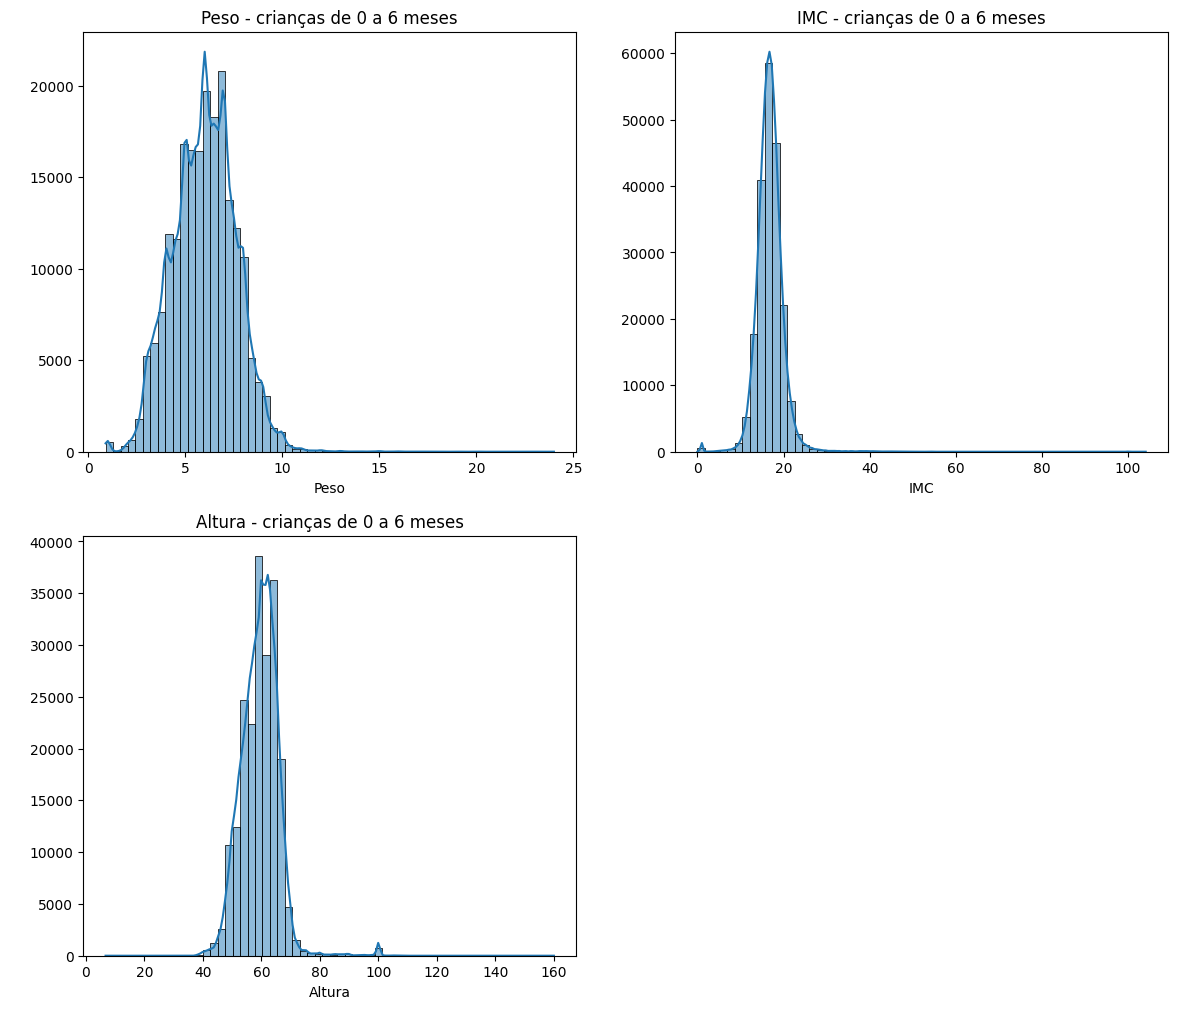

In [ ]:
plt.figure(figsize = (14,12))

plt.subplot(2,2,1)
sn.histplot(faixa_etaria_1['Peso'], bins=60, kde=True)
plt.title("Peso - crianças de 0 a 6 meses")
plt.ylabel(" ")


plt.subplot(2,2,2)
sn.histplot(faixa_etaria_1['IMC'], bins=60, kde=True)
plt.title("IMC - crianças de 0 a 6 meses")
plt.ylabel(" ")


plt.subplot(2,2,3)
sn.histplot(faixa_etaria_1['Altura'], bins=60, kde=True)
plt.title("Altura - crianças de 0 a 6 meses")
plt.ylabel(" ")

plt.show()

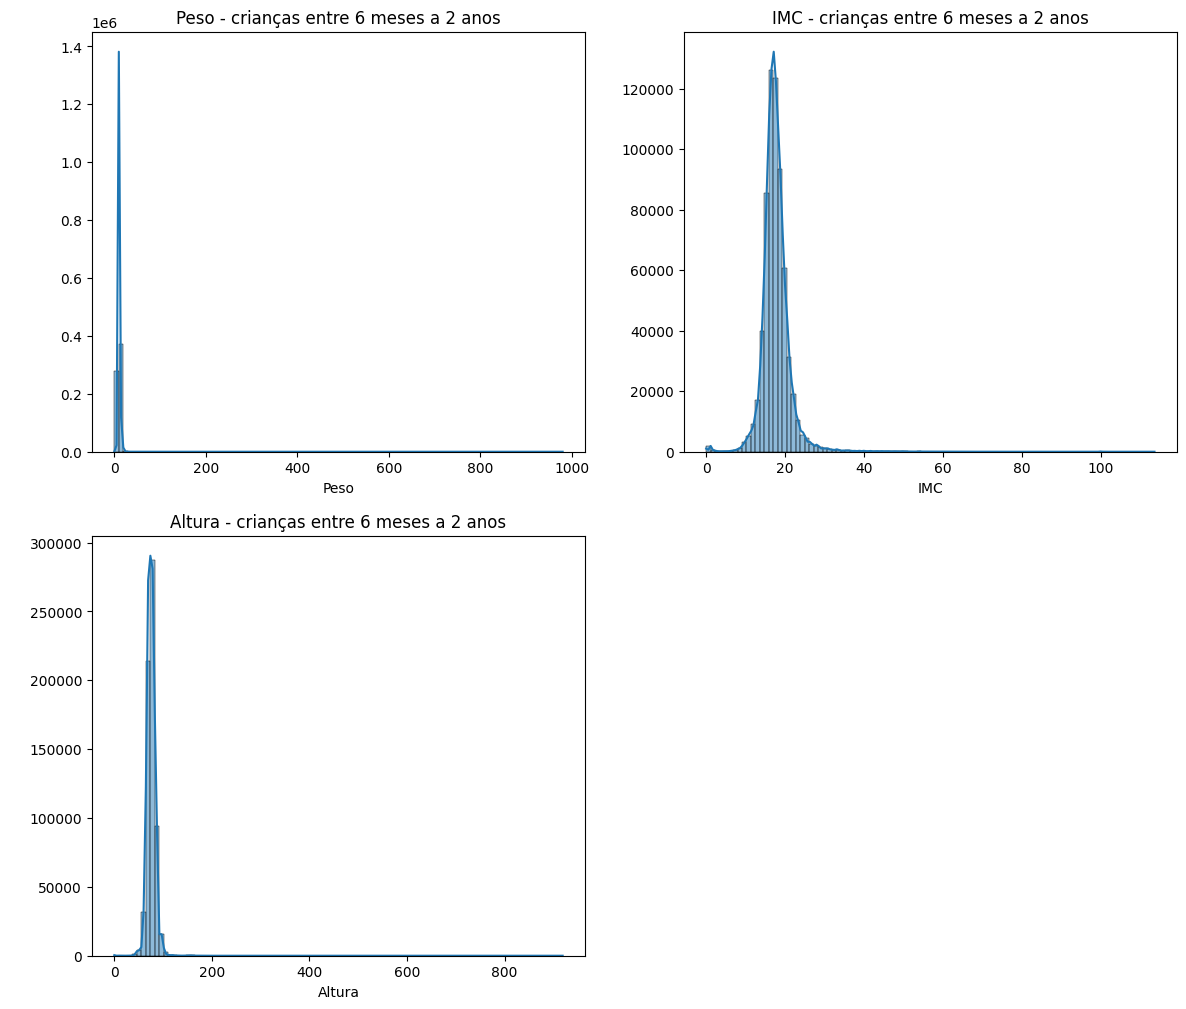

In [ ]:
plt.figure(figsize = (14,12))

plt.subplot(2,2,1)
sn.histplot(faixa_etaria_2['Peso'], bins=100, kde=True)
plt.title("Peso - crianças entre 6 meses a 2 anos")
plt.ylabel(" ")


plt.subplot(2,2,2)
sn.histplot(faixa_etaria_2['IMC'], bins=100, kde=True)
plt.title("IMC - crianças entre 6 meses a 2 anos")
plt.ylabel(" ")


plt.subplot(2,2,3)
sn.histplot(faixa_etaria_2['Altura'], bins=100, kde=True)
plt.title("Altura - crianças entre 6 meses a 2 anos")
plt.ylabel(" ")

plt.show()

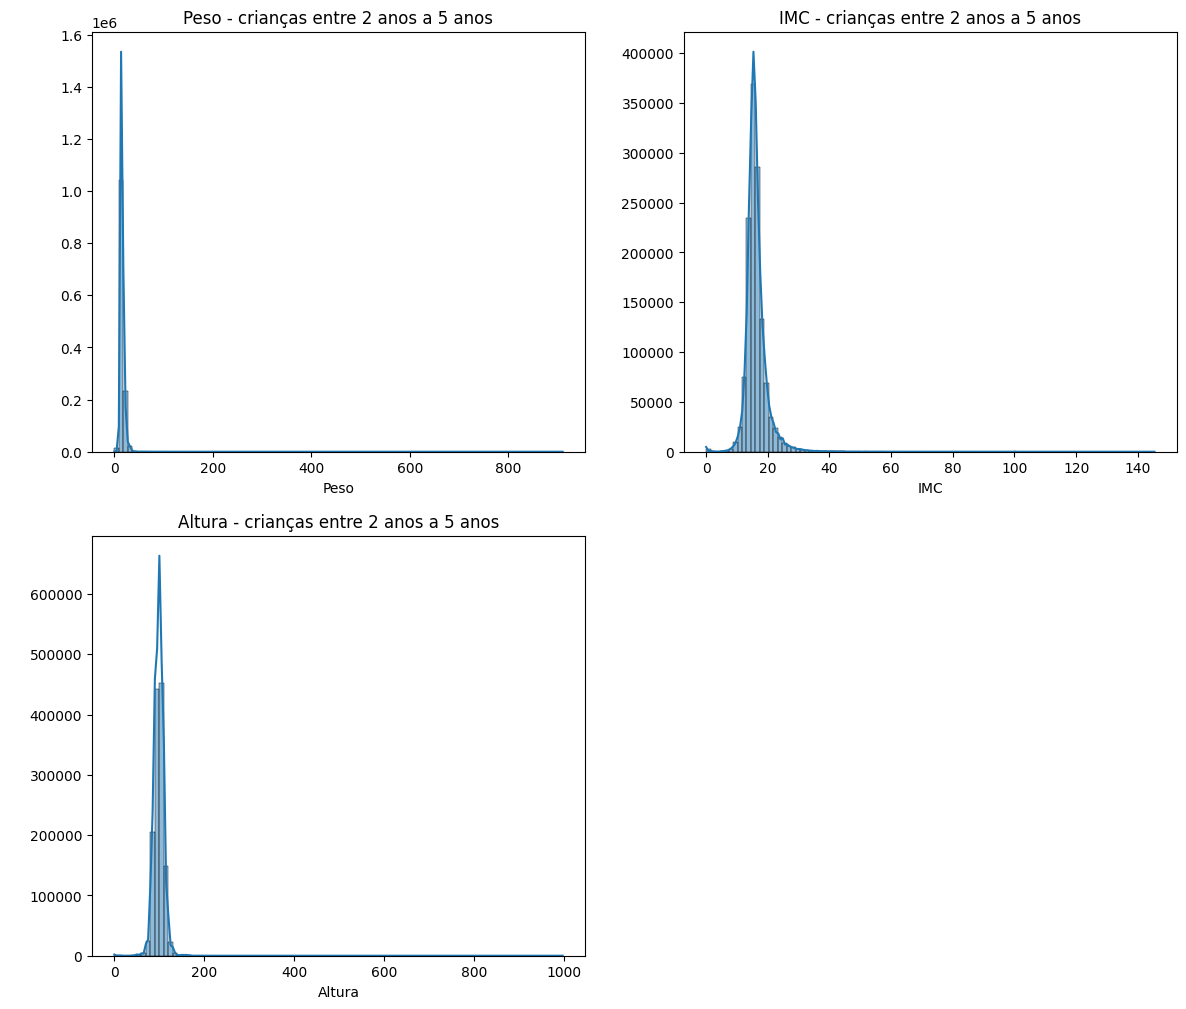

In [ ]:
plt.figure(figsize = (14,12))

plt.subplot(2,2,1)
sn.histplot(faixa_etaria_3['Peso'], bins=100, kde=True)
plt.title("Peso - crianças entre 2 anos a 5 anos")
plt.ylabel(" ")


plt.subplot(2,2,2)
sn.histplot(faixa_etaria_3['IMC'], bins=100, kde=True)
plt.title("IMC - crianças entre 2 anos a 5 anos")
plt.ylabel(" ")


plt.subplot(2,2,3)
sn.histplot(faixa_etaria_3['Altura'], bins=100, kde=True)
plt.title("Altura - crianças entre 2 anos a 5 anos")
plt.ylabel(" ")

plt.show()


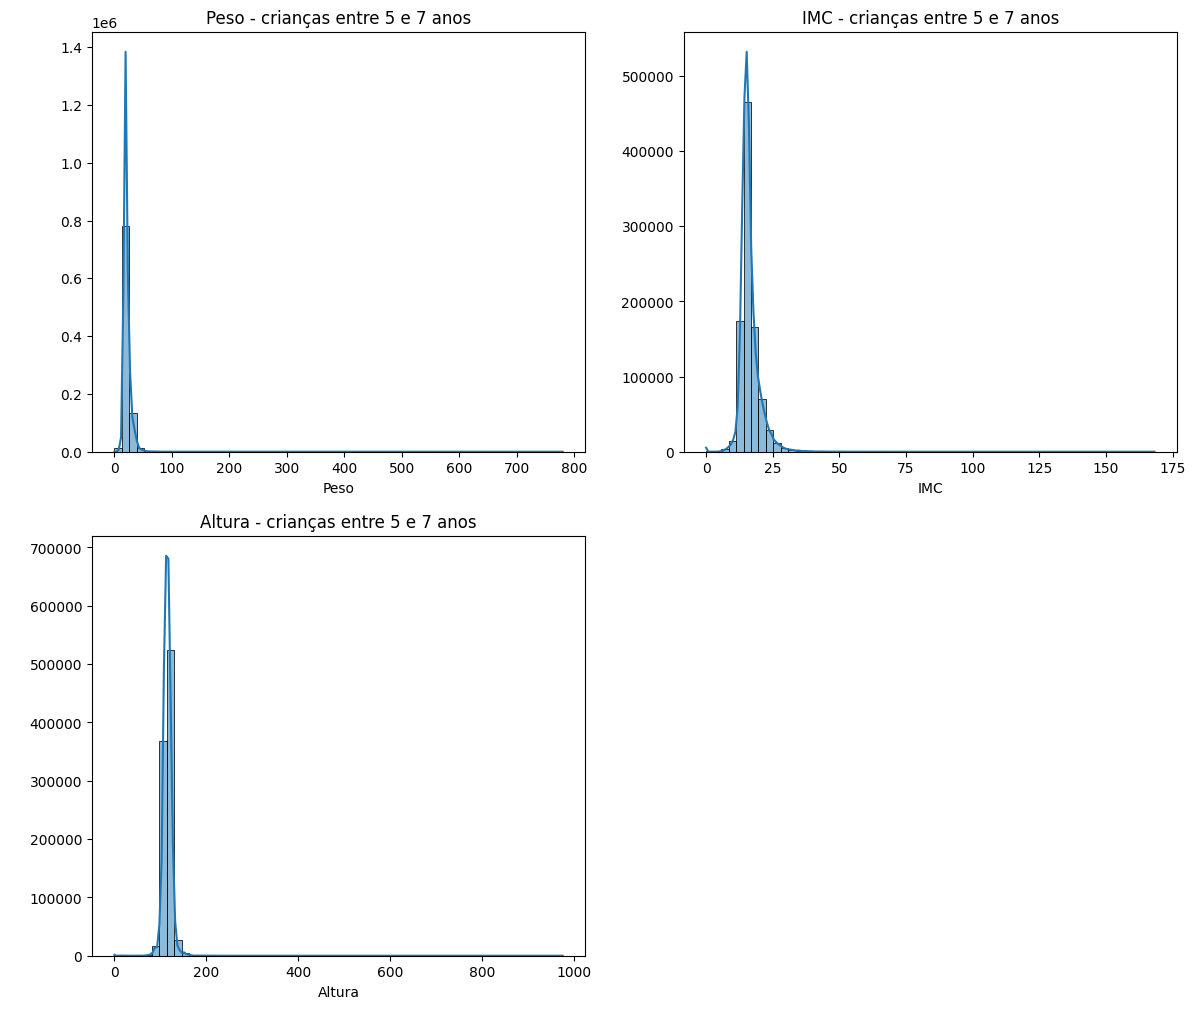

In [ ]:
plt.figure(figsize = (14,12))

plt.subplot(2,2,1)
sn.histplot(faixa_etaria_4['Peso'], bins=60, kde=True)
plt.title("Peso - crianças entre 5 e 7 anos")
plt.ylabel(" ")


plt.subplot(2,2,2)
sn.histplot(faixa_etaria_4['IMC'], bins=60, kde=True)
plt.title("IMC - crianças entre 5 e 7 anos")
plt.ylabel(" ")


plt.subplot(2,2,3)
sn.histplot(faixa_etaria_4['Altura'], bins=60, kde=True)
plt.title("Altura - crianças entre 5 e 7 anos")
plt.ylabel(" ")

plt.show()

# Analisando a distribuição das variáveis categóricas

<ipython-input-172-00fcd8ce9afb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Estado', y='Contagem', data=contagem_UF, palette='ocean')


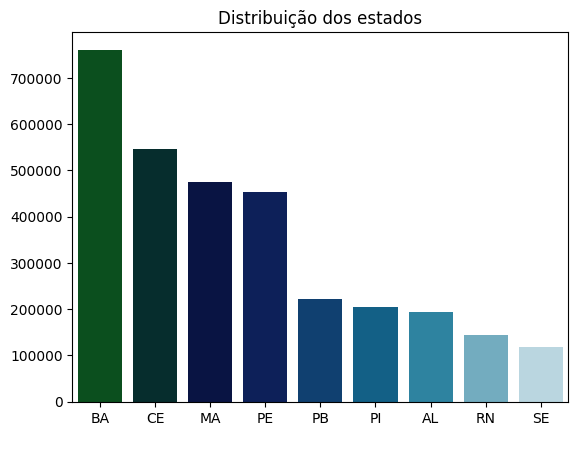

In [ ]:
contagem_UF = df_limpa['UF'].value_counts().reset_index()

contagem_UF.columns = ['Estado', 'Contagem']
sn.barplot(x='Estado', y='Contagem', data=contagem_UF, palette='ocean')

plt.title('Distribuição dos estados')
plt.xlabel(' ')
plt.ylabel('')

plt.show()

<ipython-input-173-dd1f84fab2b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Faixa etária', y='Contagem', data=contagem_fase_da_vida, palette='ocean')


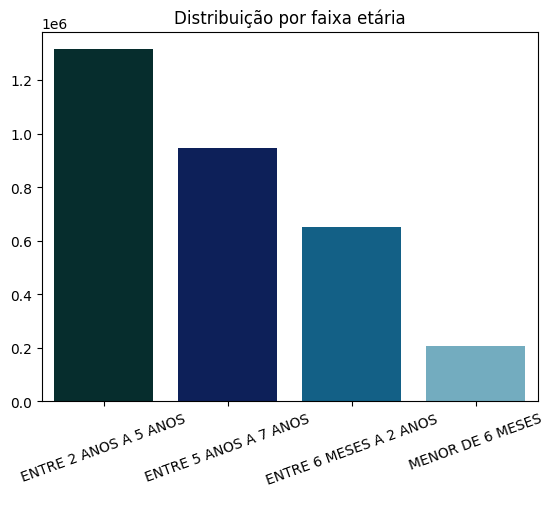

In [ ]:
contagem_fase_da_vida = df_limpa['Fase_da_vida'].value_counts().reset_index()

contagem_fase_da_vida.columns = ['Faixa etária', 'Contagem']
sn.barplot(x='Faixa etária', y='Contagem', data=contagem_fase_da_vida, palette='ocean')
plt.xticks(rotation=20)


plt.title('Distribuição por faixa etária')
plt.xlabel(' ')
plt.ylabel('')

plt.show()

<ipython-input-174-8ed265a578c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Gênero', y='Contagem', data=contagem_genero, palette='ocean')


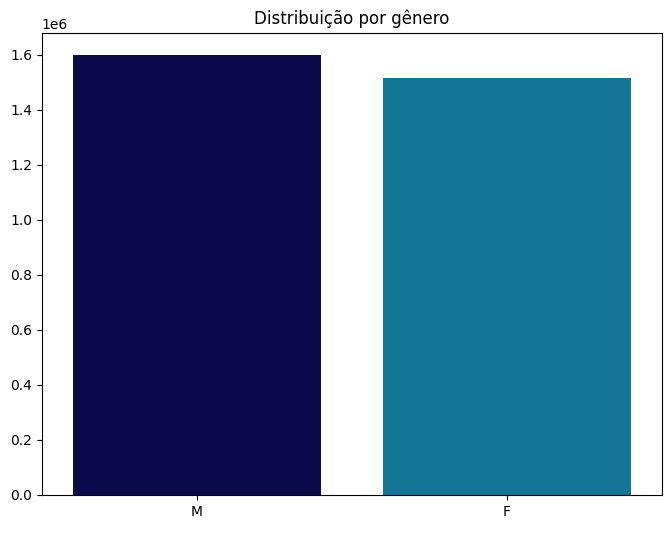

In [ ]:
contagem_genero = df_limpa['Gênero'].value_counts().reset_index()
plt.figure(figsize=(8,6))
contagem_genero.columns = ['Gênero', 'Contagem']
sn.barplot(x='Gênero', y='Contagem', data=contagem_genero, palette='ocean')

plt.title('Distribuição por gênero')
plt.xlabel(' ')
plt.ylabel('')

plt.show()


<ipython-input-175-154b7f2eafb9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Cor', y='Contagem', data=contagem_cor, palette='ocean')


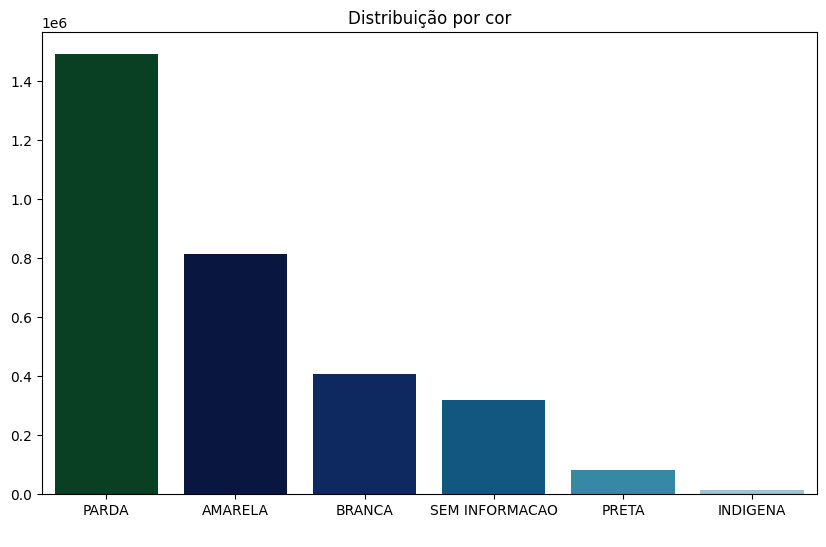

In [ ]:
contagem_cor = df_limpa['Cor'].value_counts().reset_index()
plt.figure(figsize = (10,6))
contagem_cor.columns = ['Cor', 'Contagem']
sn.barplot(x='Cor', y='Contagem', data=contagem_cor, palette='ocean')

plt.title('Distribuição por cor')
plt.xlabel(' ')
plt.ylabel('')

plt.show()

### Com base nesses gráficos, já podemos traçar o perfil que predomina entre as crianças desta base de dados: a maioria é parda, do estado da Bahia, do  gênero masculino e tem entre 2 a 5 anos.

##Estado nutricional de peso para a idade

In [ ]:
print("Crianças com menos de 6 meses", end = "\n\n")
print(faixa_etaria_1['Estado_nutricional_de peso_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 6 meses a 2 anos", end = "\n\n")
print(faixa_etaria_2['Estado_nutricional_de peso_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 2 anos a 5 anos", end = "\n\n")
print(faixa_etaria_3['Estado_nutricional_de peso_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 5 anos a 7 anos", end = "\n\n")
print(faixa_etaria_4['Estado_nutricional_de peso_para_idade'].value_counts())


Crianças com menos de 6 meses

Estado_nutricional_de peso_para_idade
Peso adequado para idade         180374
Peso elevado para a idade         16937
Baixo peso para a idade            4973
Muito baixo peso para a idade      3990
Name: count, dtype: int64
----------------------------------------
Crianças entre 6 meses a 2 anos

Estado_nutricional_de peso_para_idade
Peso adequado para idade         564297
Peso elevado para a idade         60771
Baixo peso para a idade           15265
Muito baixo peso para a idade     11998
Name: count, dtype: int64
----------------------------------------
Crianças entre 2 anos a 5 anos

Estado_nutricional_de peso_para_idade
Peso adequado para idade         1125573
Peso elevado para a idade         122226
Baixo peso para a idade            43950
Muito baixo peso para a idade      21859
Name: count, dtype: int64
----------------------------------------
Crianças entre 5 anos a 7 anos

Estado_nutricional_de peso_para_idade
Peso adequado para idade         78

#### Percebemos que, em todas as quatro faixas etárias, a maior parte das crianças foram classificadas com peso adequado para a idade, enquanto a minoria delas apresenta peso muito baixo para a idade (o que é uma boa notícia).

##Estado nutricional de peso

In [ ]:
print("Crianças com menos de 6 meses", end = "\n\n")
print(faixa_etaria_1['Estado_nutricional_de_peso'].value_counts())
print('-' * 40)
print("Crianças entre 6 meses a 2 anos", end = "\n\n")
print(faixa_etaria_2['Estado_nutricional_de_peso'].value_counts())
print('-' * 40)
print("Crianças entre 2 anos a 5 anos", end = "\n\n")
print(faixa_etaria_3['Estado_nutricional_de_peso'].value_counts())
print('-' * 40)
print("Crianças entre 5 anos a 7 anos", end = "\n\n")
print(faixa_etaria_4['Estado_nutricional_de_peso'].value_counts())

Crianças com menos de 6 meses

Estado_nutricional_de_peso
Peso Adequado ou Eutrofico    132198
Risco de sobrepeso             34728
Sobrepeso                      14665
Obesidade                       9263
Magreza                         8853
Magreza acentuada               6567
Name: count, dtype: int64
----------------------------------------
Crianças entre 6 meses a 2 anos

Estado_nutricional_de_peso
Peso Adequado ou Eutrofico    373221
Risco de sobrepeso            135014
Sobrepeso                      62682
Obesidade                      45767
Magreza acentuada              19159
Magreza                        16512
Name: count, dtype: int64
----------------------------------------
Crianças entre 2 anos a 5 anos

Estado_nutricional_de_peso
Peso Adequado ou Eutrofico    806425
Risco de sobrepeso            202315
Obesidade                     124891
Sobrepeso                      93511
Magreza                        42683
Magreza acentuada              36985
Name: count, dtype: int

Obs: O termo "eutrofia" refere-se ao estado nutricional adequado, onde a criança apresenta um crescimento e desenvolvimento dentro dos padrões esperados para sua idade. Isso significa que a criança não está subnutrida nem apresenta excesso de peso, ou seja, possui um peso saudável e está crescendo conforme o esperado.

Com base na observação da distribuição dos dados, percebemos que:
* A maior parte das crianças apresenta peso adequado, em todas as quatro faixas etárias.
* Há mais casos de obesidade entre crianças com mais de 2 anos de idade.
* Há mais casos de magreza acentuada em crianças entre 6 meses a 2 anos de idade.

##Estado nutricional de altura para a idade





In [ ]:
print("Crianças com menos de 6 meses", end = "\n\n")
print(faixa_etaria_1['Estado_nutricional_de_altura_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 6 meses a 2 anos", end = "\n\n")
print(faixa_etaria_2['Estado_nutricional_de_altura_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 2 anos a 5 anos", end = "\n\n")
print(faixa_etaria_3['Estado_nutricional_de_altura_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 5 anos a 7 anos", end = "\n\n")
print(faixa_etaria_4['Estado_nutricional_de_altura_para_idade'].value_counts())

Crianças com menos de 6 meses

Estado_nutricional_de_altura_para_idade
Estatura adequada para a idade     187212
Baixa estatura para idade           10008
Muito baixa estatura para idade      9054
Name: count, dtype: int64
----------------------------------------
Crianças entre 6 meses a 2 anos

Estado_nutricional_de_altura_para_idade
Estatura adequada para a idade     547790
Muito baixa estatura para idade     52835
Baixa estatura para idade           51696
Name: count, dtype: int64
----------------------------------------
Crianças entre 2 anos a 5 anos

Estado_nutricional_de_altura_para_idade
Estatura adequada para a idade     1156643
Baixa estatura para idade            85190
Muito baixa estatura para idade      71730
Name: count, dtype: int64
----------------------------------------
Crianças entre 5 anos a 7 anos

Estado_nutricional_de_altura_para_idade
Estatura adequada para a idade     861832
Baixa estatura para idade           50136
Muito baixa estatura para idade     33270
Name

##Estado nutricional de IMC para a idade

In [ ]:
print("Crianças com menos de 6 meses", end = "\n\n")
print(faixa_etaria_1['Estado_nutricional_de_IMC_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 6 meses a 2 anos", end = "\n\n")
print(faixa_etaria_2['Estado_nutricional_de_IMC_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 2 anos a 5 anos", end = "\n\n")
print(faixa_etaria_3['Estado_nutricional_de_IMC_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 5 anos a 7 anos", end = "\n\n")
print(faixa_etaria_4['Estado_nutricional_de_IMC_para_idade'].value_counts())

Crianças com menos de 6 meses

Estado_nutricional_de_IMC_para_idade
Eutrofia              125012
Risco de sobrepeso     42244
Sobrepeso              17938
Obesidade               9482
Magreza                 6572
Magreza acentuada       5026
Name: count, dtype: int64
----------------------------------------
Crianças entre 6 meses a 2 anos

Estado_nutricional_de_IMC_para_idade
Eutrofia              337654
Risco de sobrepeso    140427
Sobrepeso              74337
Obesidade              56651
Magreza acentuada      24795
Magreza                18491
Name: count, dtype: int64
----------------------------------------
Crianças entre 2 anos a 5 anos

Estado_nutricional_de_IMC_para_idade
Eutrofia              800996
Risco de sobrepeso    194531
Obesidade             109208
Sobrepeso              99125
Magreza                55651
Magreza acentuada      54106
Name: count, dtype: int64
----------------------------------------
Crianças entre 5 anos a 7 anos

Estado_nutricional_de_IMC_para_idade
E

# Correlações

##Correlação das variáveis numéricas

In [ ]:
df_variaveis_numericas = df_limpa.select_dtypes(include=['number'])

In [ ]:
df_variaveis_numericas.corr()

,Idade,Peso,Altura,IMC
Idade,1.000000,0.680567,0.865018,-0.120867
Peso,0.680567,1.000000,0.716232,0.237640
Altura,0.865018,0.716232,1.000000,-0.189214
IMC,-0.120867,0.237640,-0.189214,1.000000


---

##Correlação das variáveis categóricas

podemos definir as seguintes perguntas:
1. Qual estado tem crianças com o pior estado de nutrição (**desnutridas e obesas**)? (De repente daria pra pegar os top 5?)
2. No estado com a pior situação,
- qual(is) faixa(s) etária(s) estão em pior situação?
- Qual gênero está mais prejudicado?
- E cor?

In [ ]:
df_limpa.head()

,UF,Município,Idade,Fase_da_vida,Gênero,Cor,Peso,Altura,IMC,Estado_nutricional_de peso_para_idade,Estado_nutricional_de_peso,Estado_nutricional_de_altura_para_idade,Estado_nutricional_de_IMC_para_idade
5,MA,PACO DO LUMIAR,2,ENTRE 2 ANOS A 5 ANOS,M,PARDA,13.5,92.0,15.95,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
8,PI,CABECEIRAS DO PIAUI,2,ENTRE 2 ANOS A 5 ANOS,F,AMARELA,17.0,100.0,17.00,Peso adequado para idade,Risco de sobrepeso,Estatura adequada para a idade,Risco de sobrepeso
9,CE,FORTALEZA,2,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,16.5,94.0,18.67,Peso adequado para idade,Sobrepeso,Estatura adequada para a idade,Sobrepeso
10,BA,CONDEUBA,2,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,11.2,88.0,14.46,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
12,PI,CAMPO MAIOR,1,ENTRE 6 MESES A 2 ANOS,F,AMARELA,13.0,90.0,16.05,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia


In [ ]:
variaveis_numericas.head()

,Idade,Peso,Altura,IMC
5,2,13.5,92.0,15.95
8,2,17.0,100.0,17.00
9,2,16.5,94.0,18.67
10,2,11.2,88.0,14.46
12,1,13.0,90.0,16.05


In [ ]:
variaveis_categoricas.head()

,UF,Município,Fase_da_vida,Gênero,Cor,Estado_nutricional_de peso_para_idade,Estado_nutricional_de_peso,Estado_nutricional_de_altura_para_idade,Estado_nutricional_de_IMC_para_idade
5,MA,PACO DO LUMIAR,ENTRE 2 ANOS A 5 ANOS,M,PARDA,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
8,PI,CABECEIRAS DO PIAUI,ENTRE 2 ANOS A 5 ANOS,F,AMARELA,Peso adequado para idade,Risco de sobrepeso,Estatura adequada para a idade,Risco de sobrepeso
9,CE,FORTALEZA,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,Peso adequado para idade,Sobrepeso,Estatura adequada para a idade,Sobrepeso
10,BA,CONDEUBA,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
12,PI,CAMPO MAIOR,ENTRE 6 MESES A 2 ANOS,F,AMARELA,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia


In [ ]:
variaveis_categoricas['UF'].value_counts()

,count
UF,
BA,760999
CE,545463
MA,474347
PE,453474
PB,221873
PI,204953
AL,193888
RN,143383
SE,119267


In [ ]:
variaveis_categoricas['Estado_nutricional_de peso_para_idade'].unique()

array(['Peso adequado para idade', 'Peso elevado para a idade',
       'Baixo peso para a idade', 'Muito baixo peso para a idade', None],
      dtype=object)

In [ ]:
variaveis_categoricas['Estado_nutricional_de peso_para_idade'][variaveis_categoricas['UF'] == 'SE'].value_counts()

,count
Estado_nutricional_de peso_para_idade,
Peso adequado para idade,102901
Peso elevado para a idade,11789
Baixo peso para a idade,3226
Muito baixo peso para a idade,1348


In [ ]:
variaveis_categoricas['Estado_nutricional_de peso_para_idade'][variaveis_categoricas['UF'] == 'BA'].value_counts()

,count
Estado_nutricional_de peso_para_idade,
Peso adequado para idade,654211
Peso elevado para a idade,71869
Baixo peso para a idade,21290
Muito baixo peso para a idade,13592


## UFs com pior indices de: Estado_nutricional_de peso_para_idade


In [ ]:
result = variaveis_categoricas.groupby(['Estado_nutricional_de peso_para_idade', 'UF']).size().reset_index(name='Quantidade')

ranking = result.sort_values(by=['UF','Estado_nutricional_de peso_para_idade'], ascending=[True, False])

ranking

,Estado_nutricional_de peso_para_idade,UF,Quantidade
27,Peso elevado para a idade,AL,18426
18,Peso adequado para idade,AL,167018
9,Muito baixo peso para a idade,AL,2618
0,Baixo peso para a idade,AL,5824
28,Peso elevado para a idade,BA,71869
19,Peso adequado para idade,BA,654211
10,Muito baixo peso para a idade,BA,13592
1,Baixo peso para a idade,BA,21290
29,Peso elevado para a idade,CE,69786
20,Peso adequado para idade,CE,457631


Iremos considerar a porcentagem de de crianças em cada situação nutricional para cada estado.

In [ ]:
# Lista dos estados
estados = df_limpa.UF.unique()

# Dicionário para armazenar os DataFrames de cada estado
dfs_estados = {}

# Itera sobre a lista de estados
for estado in estados:
    # Filtra o DataFrame 'ranking' para cada estado
    df_estado = ranking[ranking['UF'] == estado].copy()

    # Calcula a porcentagem para o estado
    df_estado[f'%'] = df_estado['Quantidade'] / df_estado['Quantidade'].sum() * 100

    # Armazena o DataFrame no dicionário
    dfs_estados[estado] = df_estado

# Exibe o DataFrame de cada estado
for estado in estados:
    print(f"\nDataFrame para {estado}:")
    print(dfs_estados[estado])



DataFrame para MA:
   Estado_nutricional_de peso_para_idade  UF  Quantidade          %
30             Peso elevado para a idade  MA       33772   7.120493
21              Peso adequado para idade  MA      400955  84.537406
12         Muito baixo peso para a idade  MA       12961   2.732699
3                Baixo peso para a idade  MA       26605   5.609402

DataFrame para PI:
   Estado_nutricional_de peso_para_idade  UF  Quantidade          %
33             Peso elevado para a idade  PI       16686   8.141577
24              Peso adequado para idade  PI      179514  87.590023
15         Muito baixo peso para a idade  PI        2507   1.223237
6                Baixo peso para a idade  PI        6241   3.045163

DataFrame para CE:
   Estado_nutricional_de peso_para_idade  UF  Quantidade          %
29             Peso elevado para a idade  CE       69786  12.795356
20              Peso adequado para idade  CE      457631  83.907254
11         Muito baixo peso para a idade  CE        5867

In [ ]:
import pandas as pd

# Supondo que você tenha um dicionário chamado 'dfs_estados'
# onde as chaves são os nomes dos estados e os valores são DataFrames


# A coluna que você quer comparar
coluna = '%'

# DataFrame para armazenar os valores das colunas de cada estado
comparacao = pd.DataFrame()

# Itera sobre o dicionário e adiciona a coluna ao DataFrame 'comparacao'
for estado, df in dfs_estados.items():
    comparacao[estado] = df[coluna].reset_index(drop=True)

# Exibe o DataFrame com a comparação
print(comparacao)


          MA         PI         CE         BA         PE         AL  \
0   7.120493   8.141577  12.795356   9.444493  10.771277   9.503523   
1  84.537406  87.590023  83.907254  85.971573  84.143335  86.142372   
2   2.732699   1.223237   1.075722   1.786160   2.105827   1.350278   
3   5.609402   3.045163   2.221668   2.797774   2.979561   3.003827   

          RN         PB         SE  
0  11.456132  10.556182   9.884793  
1  84.969276  85.051607  86.280017  
2   1.142475   1.730743   1.130266  
3   2.432118   2.661468   2.704924  


In [ ]:
comparacao['Estado_nutricional_de peso_para_idade'] = dfs_estados['PB']['Estado_nutricional_de peso_para_idade'].to_list()

In [ ]:
comparacao.set_index('Estado_nutricional_de peso_para_idade', inplace=True)

## Estado_nutricional_de peso_para_idade

In [ ]:
df_comparacao = comparacao.T
df_comparacao

Estado_nutricional_de peso_para_idade,Peso elevado para a idade,Peso adequado para idade,Muito baixo peso para a idade,Baixo peso para a idade
MA,7.120493,84.537406,2.732699,5.609402
PI,8.141577,87.590023,1.223237,3.045163
CE,12.795356,83.907254,1.075722,2.221668
BA,9.444493,85.971573,1.786160,2.797774
PE,10.771277,84.143335,2.105827,2.979561
AL,9.503523,86.142372,1.350278,3.003827
RN,11.456132,84.969276,1.142475,2.432118
PB,10.556182,85.051607,1.730743,2.661468
SE,9.884793,86.280017,1.130266,2.704924


In [ ]:
top_5_peso_elevado = df_comparacao['Peso elevado para a idade'].sort_values(ascending=False).head(5)
top_5_peso_elevado

,Peso elevado para a idade
CE,12.795356
RN,11.456132
PE,10.771277
PB,10.556182
SE,9.884793


In [ ]:
top_5_peso_adequado = df_comparacao['Peso adequado para idade'].sort_values(ascending=False).head(5)
top_5_peso_adequado

,Peso adequado para idade
PI,87.590023
SE,86.280017
AL,86.142372
BA,85.971573
PB,85.051607


In [ ]:
top_5_muito_baixo = df_comparacao['Muito baixo peso para a idade'].sort_values(ascending=False).head(5)
top_5_muito_baixo

,Muito baixo peso para a idade
MA,2.732699
PE,2.105827
BA,1.786160
PB,1.730743
AL,1.350278


In [ ]:
top_5_baixo = df_comparacao['Baixo peso para a idade'].sort_values(ascending=False).head(5)
top_5_baixo

,Baixo peso para a idade
MA,5.609402
PI,3.045163
AL,3.003827
PE,2.979561
BA,2.797774


Assim, observamos que o estado com maior indice de

peso elevado por idade são: CE, RN e PE.

peso muito baixo por idde: MA, PE e BA

## Estado_nutricional_de_peso

In [ ]:
variaveis_categoricas['Estado_nutricional_de_peso'].unique()

array(['Peso Adequado ou Eutrofico', 'Risco de sobrepeso', 'Sobrepeso',
       'Obesidade', 'Magreza', 'Magreza acentuada', None], dtype=object)

In [ ]:
result = variaveis_categoricas.groupby(['Estado_nutricional_de_peso', 'UF']).size().reset_index(name='Quantidade')

ranking_1 = result.sort_values(by=['UF','Estado_nutricional_de_peso'], ascending=[True, False])

ranking_1

,Estado_nutricional_de_peso,UF,Quantidade
45,Sobrepeso,AL,11749
36,Risco de sobrepeso,AL,25640
27,Peso Adequado ou Eutrofico,AL,87063
18,Obesidade,AL,11031
9,Magreza acentuada,AL,2954
0,Magreza,AL,3988
46,Sobrepeso,BA,35876
37,Risco de sobrepeso,BA,84225
28,Peso Adequado ou Eutrofico,BA,342775
19,Obesidade,BA,40230


In [ ]:
df_limpa.UF.unique()

array(['MA', 'PI', 'CE', 'BA', 'PE', 'AL', 'RN', 'PB', 'SE'], dtype=object)

In [ ]:
# Lista dos estados
estados = df_limpa.UF.unique() #['MA', 'PI', 'CE', 'BA', 'PE', 'AL', 'RN', 'PB', 'SE']

# Dicionário para armazenar os DataFrames de cada estado
dfs_estados_1 = {}

# Itera sobre a lista de estados
for estado in estados:
    # Filtra o DataFrame 'ranking' para cada estado
    df_estado_1 = ranking_1[ranking_1['UF'] == estado].copy()

    # Calcula a porcentagem para o estado
    df_estado_1[f'%'] = df_estado_1['Quantidade'] / df_estado_1['Quantidade'].sum() * 100

    # Armazena o DataFrame no dicionário
    dfs_estados_1[estado] = df_estado_1

# Exibe o DataFrame de cada estado
for estado in estados:
    print(f"\nDataFrame para {estado}:")
    print(dfs_estados_1[estado])



DataFrame para MA:
    Estado_nutricional_de_peso  UF  Quantidade          %
48                   Sobrepeso  MA       21748   6.585414
39          Risco de sobrepeso  MA       48008  14.537086
30  Peso Adequado ou Eutrofico  MA      202926  61.447107
21                   Obesidade  MA       25914   7.846902
12           Magreza acentuada  MA       16756   5.073809
3                      Magreza  MA       14893   4.509682

DataFrame para PI:
    Estado_nutricional_de_peso  UF  Quantidade          %
51                   Sobrepeso  PI        9825   6.689863
42          Risco de sobrepeso  PI       23298  15.863656
33  Peso Adequado ou Eutrofico  PI       95527  65.044531
24                   Obesidade  PI        9920   6.754548
15           Magreza acentuada  PI        3504   2.385881
6                      Magreza  PI        4790   3.261521

DataFrame para CE:
    Estado_nutricional_de_peso  UF  Quantidade          %
47                   Sobrepeso  CE       37350   9.739879
38          

In [ ]:
dfs_estados_1[estado]

,Estado_nutricional_de_peso,UF,Quantidade,%
53,Sobrepeso,SE,7066,8.514176
44,Risco de sobrepeso,SE,14650,17.652517
35,Peso Adequado ou Eutrofico,SE,48808,58.811196
26,Obesidade,SE,7920,9.543203
17,Magreza acentuada,SE,2086,2.513526
8,Magreza,SE,2461,2.965382


In [ ]:
coluna = '%'

# DataFrame para armazenar os valores das colunas de cada estado
comparacao_1 = pd.DataFrame()

# Itera sobre o dicionário e adiciona a coluna ao DataFrame 'comparacao_1'
for estado, df in dfs_estados_1.items():
    comparacao_1[estado] = df[coluna].reset_index(drop=True)

# Exibe o DataFrame com a comparação
print(comparacao_1)

          MA         PI         CE         BA         PE         AL  \
0   6.585414   6.689863   9.739879   6.661975   8.044605   8.249254   
1  14.537086  15.863656  19.532694  15.640117  17.594315  18.002457   
2  61.447107  65.044531  55.904035  63.651422  60.173025  61.129015   
3   7.846902   6.754548  10.224135   7.470489   9.050332   7.745129   
4   5.073809   2.385881   2.185801   3.035547   2.431441   2.074074   
5   4.509682   3.261521   2.413456   3.540451   2.706282   2.800070   

          RN         PB         SE  
0   8.735789   8.347130   8.514176  
1  18.818421  18.609924  17.652517  
2  58.969689  60.625417  58.811196  
3   8.751126   7.863426   9.543203  
4   2.180832   2.089871   2.513526  
5   2.544144   2.464232   2.965382  


In [ ]:
# df_compracao_1.drop('Estado_nutricional_de peso_para_idade', inplace=True)

In [ ]:
comparacao_1

,MA,PI,CE,BA,PE,AL,RN,PB,SE
0,6.585414,6.689863,9.739879,6.661975,8.044605,8.249254,8.735789,8.347130,8.514176
1,14.537086,15.863656,19.532694,15.640117,17.594315,18.002457,18.818421,18.609924,17.652517
2,61.447107,65.044531,55.904035,63.651422,60.173025,61.129015,58.969689,60.625417,58.811196
3,7.846902,6.754548,10.224135,7.470489,9.050332,7.745129,8.751126,7.863426,9.543203
4,5.073809,2.385881,2.185801,3.035547,2.431441,2.074074,2.180832,2.089871,2.513526
5,4.509682,3.261521,2.413456,3.540451,2.706282,2.800070,2.544144,2.464232,2.965382


In [ ]:
comparacao_1['Estado_nutricional_de_peso'] = dfs_estados_1['PB']['Estado_nutricional_de_peso'].to_list()

In [ ]:
comparacao_1.set_index('Estado_nutricional_de_peso', inplace=True)

In [ ]:
df_compracao_1 = comparacao_1.T

In [ ]:
df_compracao_1

Estado_nutricional_de_peso,Sobrepeso,Risco de sobrepeso,Peso Adequado ou Eutrofico,Obesidade,Magreza acentuada,Magreza
MA,6.585414,14.537086,61.447107,7.846902,5.073809,4.509682
PI,6.689863,15.863656,65.044531,6.754548,2.385881,3.261521
CE,9.739879,19.532694,55.904035,10.224135,2.185801,2.413456
BA,6.661975,15.640117,63.651422,7.470489,3.035547,3.540451
PE,8.044605,17.594315,60.173025,9.050332,2.431441,2.706282
AL,8.249254,18.002457,61.129015,7.745129,2.074074,2.800070
RN,8.735789,18.818421,58.969689,8.751126,2.180832,2.544144
PB,8.347130,18.609924,60.625417,7.863426,2.089871,2.464232
SE,8.514176,17.652517,58.811196,9.543203,2.513526,2.965382


In [ ]:
top_5_sobrepeso = df_compracao_1['Sobrepeso'].sort_values(ascending=False).head(5)
top_5_sobrepeso

,Sobrepeso
CE,9.739879
RN,8.735789
SE,8.514176
PB,8.347130
AL,8.249254


In [ ]:
top_5_Obesidade = df_compracao_1['Obesidade'].sort_values(ascending=False).head(5)
top_5_Obesidade

,Obesidade
CE,10.224135
SE,9.543203
PE,9.050332
RN,8.751126
PB,7.863426


In [ ]:
top_5_Magreza_acentuada = df_compracao_1['Magreza acentuada'].sort_values(ascending=False).head(5)
top_5_Magreza_acentuada

,Magreza acentuada
MA,5.073809
BA,3.035547
SE,2.513526
PE,2.431441
PI,2.385881


In [ ]:
top_5_Magreza = df_compracao_1['Magreza'].sort_values(ascending=False).head(5)
top_5_Magreza

,Magreza
MA,4.509682
BA,3.540451
PI,3.261521
SE,2.965382
AL,2.800070


## Estado_nutricional_de_IMC_para_idade

In [ ]:
variaveis_categoricas['Estado_nutricional_de_IMC_para_idade'].unique()

array(['Eutrofia', 'Risco de sobrepeso', 'Sobrepeso', 'Obesidade',
       'Magreza', 'Magreza acentuada', None], dtype=object)

In [ ]:
result = variaveis_categoricas.groupby(['Estado_nutricional_de_IMC_para_idade', 'UF']).size().reset_index(name='Quantidade')

ranking_2 = result.sort_values(by=['UF','Estado_nutricional_de_IMC_para_idade'], ascending=[True, False])

ranking_2

,Estado_nutricional_de_IMC_para_idade,UF,Quantidade
45,Sobrepeso,AL,17181
36,Risco de sobrepeso,AL,33342
27,Obesidade,AL,14582
18,Magreza acentuada,AL,5496
9,Magreza,AL,6556
0,Eutrofia,AL,116729
46,Sobrepeso,BA,56304
37,Risco de sobrepeso,BA,113524
28,Obesidade,BA,52671
19,Magreza acentuada,BA,29248


In [ ]:
df_limpa.UF.unique()

array(['MA', 'PI', 'CE', 'BA', 'PE', 'AL', 'RN', 'PB', 'SE'], dtype=object)

In [ ]:
# Lista dos estados
estados = df_limpa.UF.unique()

# Dicionário para armazenar os DataFrames de cada estado
dfs_estados_2 = {}

# Itera sobre a lista de estados
for estado in estados:
    # Filtra o DataFrame 'ranking' para cada estado
    df_estado_2 = ranking_2[ranking_2['UF'] == estado].copy()

    # Calcula a porcentagem para o estado
    df_estado_2[f'%'] = df_estado_2['Quantidade'] / df_estado_2['Quantidade'].sum() * 100

    # Armazena o DataFrame no dicionário
    dfs_estados_2[estado] = df_estado_2

# Exibe o DataFrame de cada estado
for estado in estados:
    print(f"\nDataFrame para {estado}:")
    print(dfs_estados_2[estado])



DataFrame para MA:
   Estado_nutricional_de_IMC_para_idade  UF  Quantidade          %
48                            Sobrepeso  MA       34683   7.312491
39                   Risco de sobrepeso  MA       66033  13.922260
30                            Obesidade  MA       32635   6.880695
21                    Magreza acentuada  MA       26052   5.492749
12                              Magreza  MA       24031   5.066646
3                              Eutrofia  MA      290864  61.325158

DataFrame para PI:
   Estado_nutricional_de_IMC_para_idade  UF  Quantidade          %
51                            Sobrepeso  PI       15591   7.607258
42                   Risco de sobrepeso  PI       31412  15.326740
33                            Obesidade  PI       13094   6.388907
24                    Magreza acentuada  PI        6617   3.228608
15                              Magreza  PI        8402   4.099556
6                              Eutrofia  PI      129833  63.348931

DataFrame para CE:
  

In [ ]:
coluna = '%'

# DataFrame para armazenar os valores das colunas de cada estado
comparacao_2 = pd.DataFrame()

# Itera sobre o dicionário e adiciona a coluna ao DataFrame 'comparacao_2'
for estado, df in dfs_estados_2.items():
    comparacao_2[estado] = df[coluna].reset_index(drop=True)

# Exibe o DataFrame com a comparação
print(comparacao_2)

          MA         PI         CE         BA         PE         AL  \
0   7.312491   7.607258  10.767803   7.398968   9.129521   8.861393   
1  13.922260  15.326740  18.448222  14.918308  17.139877  17.196703   
2   6.880695   6.388907   9.843550   6.921552   8.656274   7.520914   
3   5.492749   3.228608   2.978477   3.843510   3.295087   2.834655   
4   5.066646   4.099556   3.034581   4.444190   3.290235   3.381368   
5  61.325158  63.348931  54.927367  62.473471  58.489006  60.204966   

          RN         PB         SE  
0   9.965825   9.409113   9.094034  
1  18.257079  18.032632  16.409676  
2   8.740410   7.847388   8.760324  
3   2.872088   2.942263   3.390768  
4   3.029014   3.197819   3.800780  
5  57.135584  58.570785  58.544418  


In [ ]:
comparacao_2['Estado_nutricional_de_IMC_para_idade'] = dfs_estados_2['PB']['Estado_nutricional_de_IMC_para_idade'].to_list()

In [ ]:
comparacao_2.set_index('Estado_nutricional_de_IMC_para_idade', inplace=True)

In [ ]:
df_compracao_2 = comparacao_2.T

In [ ]:
df_compracao_2

Estado_nutricional_de_IMC_para_idade,Sobrepeso,Risco de sobrepeso,Obesidade,Magreza acentuada,Magreza,Eutrofia
MA,7.312491,13.922260,6.880695,5.492749,5.066646,61.325158
PI,7.607258,15.326740,6.388907,3.228608,4.099556,63.348931
CE,10.767803,18.448222,9.843550,2.978477,3.034581,54.927367
BA,7.398968,14.918308,6.921552,3.843510,4.444190,62.473471
PE,9.129521,17.139877,8.656274,3.295087,3.290235,58.489006
AL,8.861393,17.196703,7.520914,2.834655,3.381368,60.204966
RN,9.965825,18.257079,8.740410,2.872088,3.029014,57.135584
PB,9.409113,18.032632,7.847388,2.942263,3.197819,58.570785
SE,9.094034,16.409676,8.760324,3.390768,3.800780,58.544418


In [ ]:
top_5_sobrepeso = df_compracao_2['Sobrepeso'].sort_values(ascending=False).head(5)
top_5_sobrepeso

,Sobrepeso
CE,10.767803
RN,9.965825
PB,9.409113
PE,9.129521
SE,9.094034


In [ ]:
top_5_Obesidade = df_compracao_2['Obesidade'].sort_values(ascending=False).head(5)
top_5_Obesidade

,Obesidade
CE,9.843550
SE,8.760324
RN,8.740410
PE,8.656274
PB,7.847388


In [ ]:
top_5_Magreza_acentuada = df_compracao_2['Magreza acentuada'].sort_values(ascending=False).head(5)
top_5_Magreza_acentuada

,Magreza acentuada
MA,5.492749
BA,3.843510
SE,3.390768
PE,3.295087
PI,3.228608


In [ ]:
top_5_Magreza = df_compracao_2['Magreza'].sort_values(ascending=False).head(5)
top_5_Magreza

,Magreza
MA,5.066646
BA,4.444190
PI,4.099556
SE,3.800780
AL,3.381368


In [ ]:
# Agrupando e contando as ocorrências por faixa etária e estado nutricional
faixa_etaria_analise = df_limpa.groupby(['Fase_da_vida', 'Estado_nutricional_de_peso']).size().unstack(fill_value=0)
faixa_etaria_analise = faixa_etaria_analise.loc[faixa_etaria_analise.sum(axis=1).sort_values(ascending=False).index]
print("Análise de Faixa Etária:")
print(faixa_etaria_analise)

Análise de Faixa Etária:
Estado_nutricional_de_peso  Magreza  Magreza acentuada  Obesidade  \
Fase_da_vida                                                        
ENTRE 2 ANOS A 5 ANOS         42683              36985     124891   
ENTRE 6 MESES A 2 ANOS        16512              19159      45767   
MENOR DE 6 MESES               8853               6567       9263   
ENTRE 5 ANOS A 7 ANOS          1979               1000       6026   

Estado_nutricional_de_peso  Peso Adequado ou Eutrofico  Risco de sobrepeso  \
Fase_da_vida                                                                 
ENTRE 2 ANOS A 5 ANOS                           806425              202315   
ENTRE 6 MESES A 2 ANOS                          373221              135014   
MENOR DE 6 MESES                                132198               34728   
ENTRE 5 ANOS A 7 ANOS                            37864                6486   

Estado_nutricional_de_peso  Sobrepeso  
Fase_da_vida                           
ENTRE 2 ANO

In [ ]:
# Agrupando e contando as ocorrências por genero e estado nutricional
faixa_genero = df_limpa.groupby(['Gênero', 'Estado_nutricional_de_peso']).size().unstack(fill_value=0)
faixa_genero = faixa_genero.loc[faixa_genero.sum(axis=1).sort_values(ascending=False).index]
print("Análise de Gênero")
print(faixa_genero)

Análise de Gênero
Estado_nutricional_de_peso  Magreza  Magreza acentuada  Obesidade  \
Gênero                                                              
M                             35286              34234     102688   
F                             34741              29477      83259   

Estado_nutricional_de_peso  Peso Adequado ou Eutrofico  Risco de sobrepeso  \
Gênero                                                                       
M                                               679221              196369   
F                                               670487              182174   

Estado_nutricional_de_peso  Sobrepeso  
Gênero                                 
M                               89302  
F                               83485  


In [ ]:
# Agrupando e contando as ocorrências por etinia e estado nutricional
faixa_etinia = df_limpa.groupby(['Cor', 'Estado_nutricional_de_peso']).size().unstack(fill_value=0)
faixa_etinia = faixa_etinia.loc[faixa_etinia.sum(axis=1).sort_values(ascending=False).index]

print("Análise de Etinia")
print(faixa_etinia)

Análise de Etinia
Estado_nutricional_de_peso  Magreza  Magreza acentuada  Obesidade  \
Cor                                                                 
PARDA                         29937              28485      91369   
AMARELA                       21633              18501      47698   
SEM INFORMACAO                 8476               8117      16821   
BRANCA                         7836               6615      24644   
PRETA                          1909               1717       4816   
INDIGENA                        236                276        599   

Estado_nutricional_de_peso  Peso Adequado ou Eutrofico  Risco de sobrepeso  \
Cor                                                                          
PARDA                                           526903              134216   
AMARELA                                         445534              134116   
SEM INFORMACAO                                  176816               54405   
BRANCA                                 

In [ ]:
faixa_etaria_analise = df_limpa.groupby(['Fase_da_vida', 'Estado_nutricional_de_peso']).size().unstack(fill_value=0)

top_faixa_etaria_por_estado = (
    faixa_etaria_analise.idxmax()
    .to_frame(name='Faixa_etaria_mais_frequente')
    .join(faixa_etaria_analise.max().to_frame(name='Quantidade'))
)
print("Top faixa etária por Estado Nutricional de Peso:")
print(top_faixa_etaria_por_estado)

Top faixa etária por Estado Nutricional de Peso:
                           Faixa_etaria_mais_frequente  Quantidade
Estado_nutricional_de_peso                                        
Magreza                          ENTRE 2 ANOS A 5 ANOS       42683
Magreza acentuada                ENTRE 2 ANOS A 5 ANOS       36985
Obesidade                        ENTRE 2 ANOS A 5 ANOS      124891
Peso Adequado ou Eutrofico       ENTRE 2 ANOS A 5 ANOS      806425
Risco de sobrepeso               ENTRE 2 ANOS A 5 ANOS      202315
Sobrepeso                        ENTRE 2 ANOS A 5 ANOS       93511


In [ ]:
faixa_etaria_estado_analise = df_limpa.groupby(['Fase_da_vida', 'UF', 'Estado_nutricional_de_peso']).size().unstack(fill_value=0)

top_faixa_etaria_estado_por_estado = (
    faixa_etaria_estado_analise.idxmax()
    .to_frame(name='Faixa_etaria_UF_mais_frequente')
    .join(faixa_etaria_estado_analise.max().to_frame(name='Quantidade'))
)

print("Top faixa etária e estado (UF) por Estado Nutricional de Peso:")
print(top_faixa_etaria_estado_por_estado)


Top faixa etária e estado (UF) por Estado Nutricional de Peso:
                           Faixa_etaria_UF_mais_frequente  Quantidade
Estado_nutricional_de_peso                                           
Magreza                       (ENTRE 2 ANOS A 5 ANOS, BA)       11149
Magreza acentuada             (ENTRE 2 ANOS A 5 ANOS, MA)       10282
Obesidade                     (ENTRE 2 ANOS A 5 ANOS, BA)       27019
Peso Adequado ou Eutrofico    (ENTRE 2 ANOS A 5 ANOS, BA)      206468
Risco de sobrepeso            (ENTRE 2 ANOS A 5 ANOS, BA)       45962
Sobrepeso                     (ENTRE 2 ANOS A 5 ANOS, CE)       21387


In [ ]:
faixa_etaria_estado_analise = df_limpa.groupby(['UF', 'Estado_nutricional_de_peso', 'Fase_da_vida']).size().unstack(fill_value=0)

faixa_etaria_estado_analise = faixa_etaria_estado_analise.stack().reset_index(name='Quantidade')

top_faixa_etaria_estado_por_estado = (
    faixa_etaria_estado_analise.loc[faixa_etaria_estado_analise.groupby(['UF', 'Estado_nutricional_de_peso'])['Quantidade'].idxmax()]
)
print("Top faixa etária por estado e estado nutricional de peso:")
print(top_faixa_etaria_estado_por_estado)


Top faixa etária por estado e estado nutricional de peso:
     UF  Estado_nutricional_de_peso           Fase_da_vida  Quantidade
0    AL                     Magreza  ENTRE 2 ANOS A 5 ANOS        2326
4    AL           Magreza acentuada  ENTRE 2 ANOS A 5 ANOS        1634
8    AL                   Obesidade  ENTRE 2 ANOS A 5 ANOS        7039
12   AL  Peso Adequado ou Eutrofico  ENTRE 2 ANOS A 5 ANOS       50987
16   AL          Risco de sobrepeso  ENTRE 2 ANOS A 5 ANOS       13216
20   AL                   Sobrepeso  ENTRE 2 ANOS A 5 ANOS        6053
24   BA                     Magreza  ENTRE 2 ANOS A 5 ANOS       11149
28   BA           Magreza acentuada  ENTRE 2 ANOS A 5 ANOS        8368
32   BA                   Obesidade  ENTRE 2 ANOS A 5 ANOS       27019
36   BA  Peso Adequado ou Eutrofico  ENTRE 2 ANOS A 5 ANOS      206468
40   BA          Risco de sobrepeso  ENTRE 2 ANOS A 5 ANOS       45962
44   BA                   Sobrepeso  ENTRE 2 ANOS A 5 ANOS       19608
48   CE            

In [ ]:
genero_estado_analise = df_limpa.groupby(['UF', 'Estado_nutricional_de_peso', 'Gênero']).size().unstack(fill_value=0)

genero_estado_analise = genero_estado_analise.stack().reset_index(name='Quantidade')

top_genero_estado_por_estado = (
    genero_estado_analise.loc[genero_estado_analise.groupby(['UF', 'Estado_nutricional_de_peso'])['Quantidade'].idxmax()]
)

print("Top gênero por estado e estado nutricional de peso:")
print(top_genero_estado_por_estado)


Top gênero por estado e estado nutricional de peso:
     UF  Estado_nutricional_de_peso Gênero  Quantidade
1    AL                     Magreza      M        2018
3    AL           Magreza acentuada      M        1606
5    AL                   Obesidade      M        6038
7    AL  Peso Adequado ou Eutrofico      M       43927
9    AL          Risco de sobrepeso      M       13236
11   AL                   Sobrepeso      M        6109
13   BA                     Magreza      M        9612
15   BA           Magreza acentuada      M        8729
17   BA                   Obesidade      M       21987
19   BA  Peso Adequado ou Eutrofico      M      172739
21   BA          Risco de sobrepeso      M       43729
23   BA                   Sobrepeso      M       18435
24   CE                     Magreza      F        4635
27   CE           Magreza acentuada      M        4535
29   CE                   Obesidade      M       22058
31   CE  Peso Adequado ou Eutrofico      M      107867
33   CE      

In [ ]:
# Agrupando e contando as ocorrências por etnia
contagem_etnia = df_limpa['Cor'].value_counts()

print("Contagem Geral por Etnia:")
print(contagem_etnia)

Contagem Geral por Etnia:
Cor
PARDA             1490881
AMARELA            810661
BRANCA             404937
SEM INFORMACAO     318705
PRETA               80362
INDIGENA            12101
Name: count, dtype: int64


In [ ]:
# Agrupando e contando as ocorrências por gênero
contagem_genero = df_limpa['Gênero'].value_counts()

print("Contagem Geral por Gênero:")
print(contagem_genero)

Contagem Geral por Gênero:
Gênero
M    1600431
F    1517216
Name: count, dtype: int64


In [ ]:
# Agrupando e contando as ocorrências por gênero
contagem_estado = df_limpa['Estado_nutricional_de_peso'].value_counts()

print("Contagem Geral por Estado Nutricional:")
print(contagem_estado)

Contagem Geral por Estado Nutricional:
Estado_nutricional_de_peso
Peso Adequado ou Eutrofico    1349708
Risco de sobrepeso             378543
Obesidade                      185947
Sobrepeso                      172787
Magreza                         70027
Magreza acentuada               63711
Name: count, dtype: int64


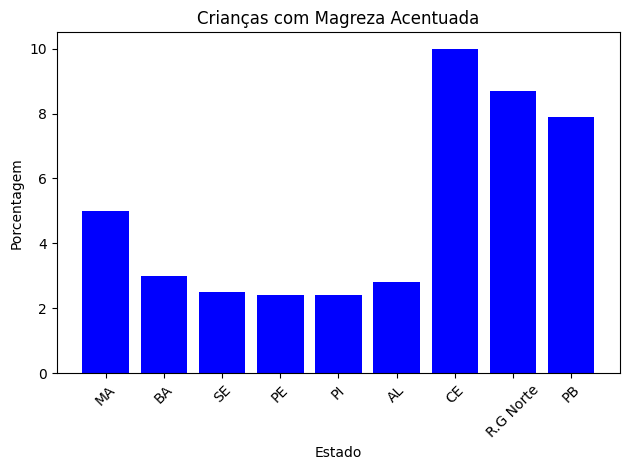

In [ ]:
import matplotlib.pyplot as plt

estados = ['MA', 'BA', 'SE', 'PE', 'PI', 'AL', 'CE', 'R.G Norte', 'PB']
magreza_acentuada = [5, 3, 2.5, 2.4, 2.4, 2.8, 10, 8.7, 7.9]

plt.bar(estados, magreza_acentuada, color='blue')

plt.title('Crianças com Magreza Acentuada')
plt.xlabel('Estado')
plt.ylabel('Porcentagem')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Gráficos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U kaleido #para salvar os gráficos feitos no plotly como arquivos de imagem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mackenzie-Projeto1/Copy of df_limpa_1.csv", keep_default_na=True)
display(df.shape)
display(df.head())
display(df.info())
display(df.isnull().sum())

(3117647, 13)

,UF,Município,Idade,Fase_da_vida,Gênero,Cor/Etnia,Peso,Altura,IMC,Estado_nutricional_Peso_e_Idade,Estado_nutricional_Peso,Estado_nutricional_Altura_e_Idade,Estado_nutricional_IMC_e_Idade
0,MA,PACO DO LUMIAR,2,ENTRE 2 ANOS A 5 ANOS,M,PARDA,13.5,92.0,15.95,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
1,PI,CABECEIRAS DO PIAUI,2,ENTRE 2 ANOS A 5 ANOS,F,AMARELA,17.0,100.0,17.00,Peso adequado para idade,Risco de sobrepeso,Estatura adequada para a idade,Risco de sobrepeso
2,CE,FORTALEZA,2,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,16.5,94.0,18.67,Peso adequado para idade,Sobrepeso,Estatura adequada para a idade,Sobrepeso
3,BA,CONDEUBA,2,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,11.2,88.0,14.46,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
4,PI,CAMPO MAIOR,1,ENTRE 6 MESES A 2 ANOS,F,AMARELA,13.0,90.0,16.05,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117647 entries, 0 to 3117646
Data columns (total 13 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   UF                                 object 
 1   Município                          object 
 2   Idade                              int64  
 3   Fase_da_vida                       object 
 4   Gênero                             object 
 5   Cor/Etnia                          object 
 6   Peso                               float64
 7   Altura                             float64
 8   IMC                                float64
 9   Estado_nutricional_Peso_e_Idade    object 
 10  Estado_nutricional_Peso            object 
 11  Estado_nutricional_Altura_e_Idade  object 
 12  Estado_nutricional_IMC_e_Idade     object 
dtypes: float64(3), int64(1), object(9)
memory usage: 309.2+ MB


None

,0
UF,0
Município,0
Idade,0
Fase_da_vida,0
Gênero,0
Cor/Etnia,0
Peso,0
Altura,0
IMC,0
Estado_nutricional_Peso_e_Idade,194


In [ ]:
contagem_fase_da_vida = df['Fase_da_vida'].value_counts().reset_index()
contagem_fase_da_vida.columns = ['Faixa etária', 'Contagem']

# Criando o gráfico de barras com Plotly
fig = px.bar(contagem_fase_da_vida,
             x='Contagem',
             y='Faixa etária')



# Adicionando rotação aos rótulos do eixo X
fig.update_layout(
    xaxis_tickangle=20,  # Rotacionando os rótulos do eixo X
    xaxis_title='',      # Remover título do eixo X
    yaxis_title='',      # Remover título do eixo Y
)

# Exibindo o gráfico
fig.show()
fig.write_image("distribuicao-por-faixa-etaria-BARRAS-HORIZONTAIS.png")

In [ ]:
contagem_fase_da_vida = df['Fase_da_vida'].value_counts().reset_index()
contagem_fase_da_vida.columns = ['Faixa etária', 'Contagem']
contagem_fase_da_vida['Porcentagem'] = round((contagem_fase_da_vida['Contagem'] / contagem_fase_da_vida['Contagem'].sum()) * 100, 2)
red_palette = ['#8B0000', '#B22222', '#FF6347', '#E9967A']
# Criando o gráfico de árvore (Treemap)
fig = px.treemap(contagem_fase_da_vida,
                 path=['Faixa etária'],  values='Contagem',  # O tamanho dos retângulos será baseado na 'Contagem'
                 color_discrete_sequence=red_palette)

fig.update_traces(textinfo='label+percent entry', textfont_size=12)
fig.show()
fig.write_image("distribuicao-por-faixa-etaria-ARVORE-com-porcentagem.jpg")

In [ ]:
df.columns

Index(['UF', 'Município', 'Idade', 'Fase_da_vida', 'Gênero', 'Cor', 'Peso',
       'Altura', 'IMC', 'Estado_nutricional_de peso_para_idade',
       'Estado_nutricional_de_peso', 'Estado_nutricional_de_altura_para_idade',
       'Estado_nutricional_de_IMC_para_idade'],
      dtype='object')

In [ ]:
df['Gênero'].value_counts()

,count
Gênero,
M,842800
F,793936
M a idade,1


In [ ]:
df_genero_count = df['Gênero'].value_counts().reset_index()
df_genero_count.columns = ['Gênero', 'Contagem']

# Calculando a porcentagem de cada contagem em relação ao total
df_genero_count['Porcentagem'] = round((df_genero_count['Contagem'] / df_genero_count['Contagem'].sum() * 100), 2)

fig = px.pie(df_genero_count,
             names='Gênero',
             values='Contagem',
             hover_data=['Porcentagem'],
             hole=0.6)
# Adicionando porcentagem como texto dentro do gráfico
fig.update_traces(textinfo='percent+label', textfont_size=15)
fig.update_layout(showlegend=False)
# Exibindo o gráfico
fig.show()
fig.write_image("distribuicao-por-genero.png")

In [ ]:
df_etnia_count = df['Cor/Etnia'].value_counts().reset_index()
df_etnia_count.columns = ['Cor', 'Contagem']

# Calculando a porcentagem de cada contagem em relação ao total
df_etnia_count['Porcentagem'] = round((df_etnia_count['Contagem'] / df_etnia_count['Contagem'].sum() * 100), 2)

# Criando o gráfico de barras
fig = px.bar(df_etnia_count,
             x='Contagem',
             y='Cor',

             text='Porcentagem')  # Adiciona o texto da porcentagem nas barras
fig.update_layout(
    xaxis_title='',  # Remove o título do eixo X
    yaxis_title=''   # Remove o título do eixo Y
)
# Exibindo o gráfico
fig.show()

In [ ]:
df_etnia_count = df['Cor/Etnia'].value_counts().reset_index()
df_etnia_count.columns = ['Cor', 'Contagem']

# Calculando a porcentagem de cada contagem em relação ao total
df_etnia_count['Porcentagem'] = round((df_etnia_count['Contagem'] / df_etnia_count['Contagem'].sum() * 100), 2)
blue_palette = ['#000080', '#0000CD', '#4169E1', '#1E90FF', '#6495ED', '#87CEFA']
# Criando o gráfico de árvore (Treemap)
fig = px.treemap(df_etnia_count,
                 path=['Cor'],  # A variável "Cor" é a hierarquia
                 values='Contagem',  # O tamanho dos retângulos será baseado na 'Contagem'
                 hover_data=['Porcentagem'],  # Exibe a porcentagem ao passar o mouse

                  color_discrete_sequence=blue_palette)  # Rótulos personalizados
print(df_etnia_count)
fig.show()
fig.write_image("distribuicao-por-cor-etnia-ARVORE.png")

              Cor  Contagem  Porcentagem
0           PARDA   1490881        47.82
1         AMARELA    810661        26.00
2          BRANCA    404937        12.99
3  SEM INFORMACAO    318705        10.22
4           PRETA     80362         2.58
5        INDIGENA     12101         0.39


##Perfil da população de acordo com o estado nutricional

In [ ]:
df_altura_idade_count = df['Estado_nutricional_Altura_e_Idade'].value_counts().reset_index()
df_altura_idade_count.columns = ['EN_Altura', 'Contagem']

# Calculando a porcentagem de cada contagem em relação ao total
df_altura_idade_count['Porcentagem'] = round((df_altura_idade_count['Contagem'] / df_altura_idade_count['Contagem'].sum() * 100), 2)

# Criando o gráfico de rosca
fig = px.pie(df_altura_idade_count,
             names='EN_Altura',
             values='Contagem',
             hover_data=['Porcentagem'],
             hole=0.6)

# Adicionando porcentagem como texto dentro do gráfico
fig.update_traces(textinfo='percent', textfont_size=15)
fig.show()
fig.write_image("estado-nutri-altura-ROSCA.png")

In [ ]:
df_sopeso_idade_count = df['Estado_nutricional_Peso'].value_counts().reset_index()
df_sopeso_idade_count.columns = ['EN_SoPESO', 'Contagem']

# Calculando a porcentagem de cada contagem em relação ao total
df_sopeso_idade_count['Porcentagem'] = round((df_sopeso_idade_count['Contagem'] / df_sopeso_idade_count['Contagem'].sum() * 100), 2)

# Criando o gráfico de barras
fig = px.bar(df_sopeso_idade_count,
             x='EN_SoPESO',
             y='Contagem',

             text='Porcentagem')  # Adiciona o texto da porcentagem nas barras
fig.update_layout(
    xaxis_title='',  # Remove o título do eixo X
    yaxis_title=''   # Remove o título do eixo Y
)
# Exibindo o gráfico
fig.show()
fig.write_image("estado-nutri-obesidade-magreza-sem-titulo.png")

##Estado nutricional considerando o peso (em cada UF)

In [ ]:
# Filtrando os dados para considerar apenas as crianças com obesidade
df_obesidade = df[df['Estado_nutricional_Peso'] == 'Obesidade']

# Contando o total de crianças por unidade federativa
total_por_estado = df.groupby('UF').size().reset_index(name='total_criancas')

# Contando as crianças com obesidade por unidade federativa
total_obesidade_por_estado = df_obesidade.groupby('UF').size().reset_index(name='obesidade')

# Mesclando os dois DataFrames: total de crianças e total de obesidade por estado
df_final = pd.merge(total_por_estado, total_obesidade_por_estado, on='UF', how='left')

# Calculando a proporção de obesidade por unidade federativa (em porcentagem)
df_final['proporcao_obesidade'] = (df_final['obesidade'] / df_final['total_criancas']) * 100
df_final = df_final.sort_values(by='obesidade')
# Criando o gráfico de barras com Plotly
fig = px.bar(df_final,
             x='UF',
             y='obesidade',
              text=df_final['proporcao_obesidade'].apply(lambda x: f"{x:.2f}"))
fig.update_layout(xaxis_title='', yaxis_title='')
# Exibindo o gráfico
fig.show()
print(df_final)
fig.write_image("obesidade-por-estado-ORDENADO-PELA-QUANTIDADE.png")

   UF  total_criancas  obesidade  proporcao_obesidade
8  SE          119267       7920             6.640563
7  RN          143383       9129             6.366864
6  PI          204953       9920             4.840134
0  AL          193888      11031             5.689367
4  PB          221873      12729             5.737066
3  MA          474347      25914             5.463089
5  PE          453474      29867             6.586265
2  CE          545463      39207             7.187839
1  BA          760999      40230             5.286472


In [ ]:
# Filtrando os dados para considerar apenas as crianças com obesidade
df_obesidade = df[df['Estado_nutricional_Peso'] == 'Obesidade']

# Contando o total de crianças por unidade federativa
total_por_estado = df.groupby('UF').size().reset_index(name='total_criancas')

# Contando as crianças com obesidade por unidade federativa
total_obesidade_por_estado = df_obesidade.groupby('UF').size().reset_index(name='obesidade')

# Mesclando os dois DataFrames: total de crianças e total de obesidade por estado
df_final = pd.merge(total_por_estado, total_obesidade_por_estado, on='UF', how='left')

# Calculando a proporção de obesidade por unidade federativa (em porcentagem)
df_final['proporcao_obesidade'] = (df_final['obesidade'] / df_final['total_criancas']) * 100
df_final = df_final.sort_values(by='proporcao_obesidade')
# Criando o gráfico de barras com Plotly
fig = px.bar(df_final,
             x='UF',
             y='obesidade',
              text=df_final['proporcao_obesidade'].apply(lambda x: f"{x:.2f}"))
fig.update_layout(xaxis_title='', yaxis_title='')
# Exibindo o gráfico
fig.show()
print(df_final)
fig.write_image("obesidade-por-estado-ORDENADO-PELA-PROPORCAO.png")

   UF  total_criancas  obesidade  proporcao_obesidade
6  PI          204953       9920             4.840134
1  BA          760999      40230             5.286472
3  MA          474347      25914             5.463089
0  AL          193888      11031             5.689367
4  PB          221873      12729             5.737066
7  RN          143383       9129             6.366864
5  PE          453474      29867             6.586265
8  SE          119267       7920             6.640563
2  CE          545463      39207             7.187839


In [ ]:
# Filtrando os dados para considerar apenas as crianças com obesidade
df_sobrepeso = df[df['Estado_nutricional_Peso'] == 'Sobrepeso']

# Contando o total de crianças por unidade federativa
total_por_estado_sobrepeso = df.groupby('UF').size().reset_index(name='total_criancas')

# Contando as crianças com obesidade por unidade federativa
total_sobrepeso_por_estado = df_sobrepeso.groupby('UF').size().reset_index(name='sobrepeso')

# Mesclando os dois DataFrames: total de crianças e total de obesidade por estado
df_final = pd.merge(total_por_estado_sobrepeso, total_sobrepeso_por_estado, on='UF', how='left')

# Calculando a proporção de obesidade por unidade federativa (em porcentagem)
df_final['proporcao_sobrepeso'] = (df_final['sobrepeso'] / df_final['total_criancas']) * 100
df_final = df_final.sort_values(by='sobrepeso')
# Criando o gráfico de barras com Plotly
fig = px.bar(df_final,
             x='UF',
             y='sobrepeso',
             text=df_final['proporcao_sobrepeso'].apply(lambda x: f"{x:.2f}"))
fig.update_layout(xaxis_title='', yaxis_title='')
# Exibindo o gráfico
fig.show()
fig.write_image("sobrepeso-por-estado-ORDENADO-PELA-QUANTIDADE.png")
print(df_final)

   UF  total_criancas  sobrepeso  proporcao_sobrepeso
8  SE          119267       7066             5.924522
7  RN          143383       9113             6.355705
6  PI          204953       9825             4.793782
0  AL          193888      11749             6.059684
4  PB          221873      13512             6.089970
3  MA          474347      21748             4.584829
5  PE          453474      26548             5.854360
1  BA          760999      35876             4.714329
2  CE          545463      37350             6.847394


In [ ]:
# Filtrando os dados para considerar apenas as crianças com obesidade
df_sobrepeso = df[df['Estado_nutricional_Peso'] == 'Sobrepeso']

# Contando o total de crianças por unidade federativa
total_por_estado_sobrepeso = df.groupby('UF').size().reset_index(name='total_criancas')

# Contando as crianças com obesidade por unidade federativa
total_sobrepeso_por_estado = df_sobrepeso.groupby('UF').size().reset_index(name='sobrepeso')

# Mesclando os dois DataFrames: total de crianças e total de obesidade por estado
df_final = pd.merge(total_por_estado_sobrepeso, total_sobrepeso_por_estado, on='UF', how='left')

# Calculando a proporção de obesidade por unidade federativa (em porcentagem)
df_final['proporcao_sobrepeso'] = (df_final['sobrepeso'] / df_final['total_criancas']) * 100
df_final = df_final.sort_values(by='proporcao_sobrepeso')
# Criando o gráfico de barras com Plotly
fig = px.bar(df_final,
             x='UF',
             y='sobrepeso',
             text=df_final['proporcao_sobrepeso'].apply(lambda x: f"{x:.2f}"))
fig.update_layout(xaxis_title='', yaxis_title='')
# Exibindo o gráfico
fig.show()
fig.write_image("sobrepeso-por-estado-ORDENADO-PELA-PROPORCAO.png")
print(df_final)

   UF  total_criancas  sobrepeso  proporcao_sobrepeso
3  MA          474347      21748             4.584829
1  BA          760999      35876             4.714329
6  PI          204953       9825             4.793782
5  PE          453474      26548             5.854360
8  SE          119267       7066             5.924522
0  AL          193888      11749             6.059684
4  PB          221873      13512             6.089970
7  RN          143383       9113             6.355705
2  CE          545463      37350             6.847394


In [ ]:
# Filtrando os dados para considerar apenas as crianças com obesidade
df_magreza_acentuada = df[df['Estado_nutricional_Peso'] == 'Magreza acentuada']

# Contando o total de crianças por unidade federativa
total_por_estado_magreza_acent = df.groupby('UF').size().reset_index(name='total_criancas')

# Contando as crianças com magreza acentuada por unidade federativa
total_magreza_acent_por_estado = df_magreza_acentuada.groupby('UF').size().reset_index(name='magreza acentuada')

# Mesclando os dois DataFrames: total de crianças e total de magreza acentuada por estado
df_final = pd.merge(total_por_estado_magreza_acent, total_magreza_acent_por_estado, on='UF', how='left')
df_final = df_final.sort_values(by='magreza acentuada')
# Calculando a proporção de obesidade por unidade federativa (em porcentagem)
df_final['proporcao_magreza_acent'] = (df_final['magreza acentuada'] / df_final['total_criancas']) * 100

# Criando o gráfico de barras com Plotly
fig = px.bar(df_final,
             x='UF',
             y='magreza acentuada',
              text=df_final['proporcao_magreza_acent'].apply(lambda x: f"{x:.2f}"))
fig.update_layout(xaxis_title='', yaxis_title='')
# Exibindo o gráfico
fig.show()
print(df_final)
fig.write_image("magreza-acentuada-por-estado-ORDENADO-PELA-QUANTIDADE.png")

   UF  total_criancas  magreza acentuada  proporcao_magreza_acent
8  SE          119267               2086                 1.749017
7  RN          143383               2275                 1.586660
0  AL          193888               2954                 1.523560
4  PB          221873               3383                 1.524746
6  PI          204953               3504                 1.709660
5  PE          453474               8024                 1.769451
2  CE          545463               8382                 1.536676
1  BA          760999              16347                 2.148097
3  MA          474347              16756                 3.532435


In [ ]:
# Filtrando os dados para considerar apenas as crianças com obesidade
df_magreza_acentuada = df[df['Estado_nutricional_Peso'] == 'Magreza acentuada']

# Contando o total de crianças por unidade federativa
total_por_estado_magreza_acent = df.groupby('UF').size().reset_index(name='total_criancas')

# Contando as crianças com magreza acentuada por unidade federativa
total_magreza_acent_por_estado = df_magreza_acentuada.groupby('UF').size().reset_index(name='magreza acentuada')

# Mesclando os dois DataFrames: total de crianças e total de magreza acentuada por estado
df_final = pd.merge(total_por_estado_magreza_acent, total_magreza_acent_por_estado, on='UF', how='left')

# Calculando a proporção de obesidade por unidade federativa (em porcentagem)
df_final['proporcao_magreza_acent'] = (df_final['magreza acentuada'] / df_final['total_criancas']) * 100
df_final = df_final.sort_values(by='proporcao_magreza_acent')
# Criando o gráfico de barras com Plotly
fig = px.bar(df_final,
             x='UF',
             y='magreza acentuada',
              text=df_final['proporcao_magreza_acent'].apply(lambda x: f"{x:.2f}"))
fig.update_layout(xaxis_title='', yaxis_title='')
# Exibindo o gráfico
fig.show()
print(df_final)
fig.write_image("magreza-acentuada-por-estado-ORDENADO-PELA-PROPORCAO.png")

   UF  total_criancas  magreza acentuada  proporcao_magreza_acent
0  AL          193888               2954                 1.523560
4  PB          221873               3383                 1.524746
2  CE          545463               8382                 1.536676
7  RN          143383               2275                 1.586660
6  PI          204953               3504                 1.709660
8  SE          119267               2086                 1.749017
5  PE          453474               8024                 1.769451
1  BA          760999              16347                 2.148097
3  MA          474347              16756                 3.532435


In [ ]:
# Filtrando os dados para considerar apenas as crianças com obesidade
df_magreza = df[df['Estado_nutricional_Peso'] == 'Magreza']

# Contando o total de crianças por unidade federativa
total_por_estado_magreza = df.groupby('UF').size().reset_index(name='total_criancas')

# Contando as crianças com obesidade por unidade federativa
total_magreza_por_estado = df_magreza.groupby('UF').size().reset_index(name='magreza')

# Mesclando os dois DataFrames: total de crianças e total de obesidade por estado
df_final = pd.merge(total_por_estado_magreza, total_magreza_por_estado, on='UF', how='left')

# Calculando a proporção de obesidade por unidade federativa (em porcentagem)
df_final['proporcao_magreza'] = (df_final['magreza'] / df_final['total_criancas']) * 100
df_final = df_final.sort_values(by='magreza')
# Criando o gráfico de barras com Plotly
fig = px.bar(df_final,
             x='UF',
             y='magreza',
              text=df_final['proporcao_magreza'].apply(lambda x: f"{x:.2f}"))
fig.update_layout(xaxis_title='', yaxis_title='')
# Exibindo o gráfico
fig.show()
print(df_final)
fig.write_image("magreza-por-estado-ORDENADO-PELA-QUANTIDADE.png")

   UF  total_criancas  magreza  proporcao_magreza
8  SE          119267     2461           2.063437
7  RN          143383     2654           1.850987
0  AL          193888     3988           2.056858
4  PB          221873     3989           1.797875
6  PI          204953     4790           2.337121
5  PE          453474     8931           1.969462
2  CE          545463     9255           1.696724
3  MA          474347    14893           3.139685
1  BA          760999    19066           2.505391


In [ ]:
# Filtrando os dados para considerar apenas as crianças com obesidade
df_magreza = df[df['Estado_nutricional_Peso'] == 'Magreza']

# Contando o total de crianças por unidade federativa
total_por_estado_magreza = df.groupby('UF').size().reset_index(name='total_criancas')

# Contando as crianças com obesidade por unidade federativa
total_magreza_por_estado = df_magreza.groupby('UF').size().reset_index(name='magreza')

# Mesclando os dois DataFrames: total de crianças e total de obesidade por estado
df_final = pd.merge(total_por_estado_magreza, total_magreza_por_estado, on='UF', how='left')

# Calculando a proporção de obesidade por unidade federativa (em porcentagem)
df_final['proporcao_magreza'] = (df_final['magreza'] / df_final['total_criancas']) * 100
df_final = df_final.sort_values(by='proporcao_magreza')
# Criando o gráfico de barras com Plotly
fig = px.bar(df_final,
             x='UF',
             y='magreza',
              text=df_final['proporcao_magreza'].apply(lambda x: f"{x:.2f}"))
fig.update_layout(xaxis_title='', yaxis_title='')
# Exibindo o gráfico
fig.show()
print(df_final)
fig.write_image("magreza-por-estado-ORDENADO-PELA-PROPORCAO.png")

   UF  total_criancas  magreza  proporcao_magreza
2  CE          545463     9255           1.696724
4  PB          221873     3989           1.797875
7  RN          143383     2654           1.850987
5  PE          453474     8931           1.969462
0  AL          193888     3988           2.056858
8  SE          119267     2461           2.063437
6  PI          204953     4790           2.337121
1  BA          760999    19066           2.505391
3  MA          474347    14893           3.139685


In [ ]:
df_filtered = df[df['Estado_nutricional_Peso'].isin(['Obesidade', 'Sobrepeso'])]

# Contando as ocorrências de obesidade e sobrepeso por gênero
count_data = df_filtered.groupby(['Gênero', 'Estado_nutricional_Peso']).size().reset_index(name='count')

# Criando o gráfico de barras com Plotly
fig = px.bar(count_data,
             x='Gênero',
             y='count',
             color='Estado_nutricional_Peso',
             barmode='group',
             )
fig.update_layout( legend_title='', xaxis_title='', yaxis_title='')
print(count_data)
fig.show()
fig.write_image("obesidade-sobrepeso-por-genero-sem-titulo.png")

  Gênero Estado_nutricional_Peso   count
0      F               Obesidade   83259
1      F               Sobrepeso   83485
2      M               Obesidade  102688
3      M               Sobrepeso   89302


In [ ]:
df_filtered = df[df['Estado_nutricional_Peso'].isin(['Magreza', 'Magreza acentuada'])]

# Contando as ocorrências de obesidade e sobrepeso por gênero
count_data = df_filtered.groupby(['Gênero', 'Estado_nutricional_Peso']).size().reset_index(name='count')

# Criando o gráfico de barras com Plotly
fig = px.bar(count_data,
             x='Gênero',
             y='count',
             color='Estado_nutricional_Peso',
             barmode='group',
             )
fig.update_layout( legend_title='', xaxis_title='', yaxis_title='')
print(count_data)
fig.show()
#fig.write_image("magrezas-por-genero-sem-titulo.png")

  Gênero Estado_nutricional_Peso  count
0      F                 Magreza  34741
1      F       Magreza acentuada  29477
2      M                 Magreza  35286
3      M       Magreza acentuada  34234


### Pegar CE e MA e ver a situação por etnia

##Analisando o Ceará, o estado que apresenta as maiores proporções de crianças obesas e com sobrepeso no Nordeste.

In [ ]:
# Filtrando o dataset para incluir apenas dados do estado do Ceará (CE)
df_ce = df[df['UF'] == 'CE']

# Filtrando as crianças com estado nutricional de "Sobrepeso" ou "Obesidade"
df_ce_filtro = df_ce[df_ce['Estado_nutricional_Peso'].isin(['Sobrepeso', 'Obesidade'])]

# Contando as ocorrências de "Sobrepeso" e "Obesidade" por "Cor/Etnia"
contagem = df_ce_filtro.groupby(['Cor/Etnia', 'Estado_nutricional_Peso']).size().reset_index(name='Contagem')

# Calculando o total de crianças por "Cor/Etnia"
total_por_etnia = df_ce.groupby('Cor/Etnia').size().reset_index(name='Total')

# Merge para calcular a porcentagem
contagem = pd.merge(contagem, total_por_etnia, on='Cor/Etnia')

# Calculando a porcentagem de obesidade e sobrepeso para cada etnia
contagem['Porcentagem'] = round((contagem['Contagem'] / contagem['Total']) * 100, 2)

# Criando o gráfico de barras com a porcentagem
fig = px.bar(contagem,
             x='Cor/Etnia',  # Eixo X: classes de Cor/Etnia
             y='Contagem',  # Eixo Y: contagem de ocorrências
             color='Estado_nutricional_Peso',  # Diferencia as barras por Estado nutricional
             barmode='group',  # Agrupa as barras para cada Cor/Etnia
             category_orders={'Cor/Etnia': ['INDIGENA', 'BRANCA', 'PRETA', 'PARDA', 'AMARELA', 'SEM INFORMACAO']},  # Ordem das categorias
             text='Porcentagem')  # Adicionando a porcentagem dentro das barras
fig.update_traces(textposition='outside')
# Ajustando a escala do eixo Y para logarítmica
fig.update_layout(yaxis=dict(tickvals=[]),legend_title='', xaxis_title='', yaxis_title='', yaxis_type="log")  # Usando a escala logarítmica no eixo Y


# Exibindo o gráfico
fig.show()
fig.write_image("CE-sobrepeso-obesidade-etnia-cor.png")


####Comentários sobre o gráfico: Os valores das proporções de crianças obesas e com sobrepeso por cor/etnia são muito próximos, mas chama a atenção o fato de os indígenas, brancos e pardos apresentarem maior número de casos de obesidade do que de sobrepeso. Também é notável que a população **preta** apresente a maior proporção de crianças obesas (7,46%) e a segunda maior proporção de crianças com sobrepeso (7,82%), o que indica que esse segmento da população está se alimentando mal, talvez consumindo alimentos hipercalóricos e ultraprocessados. Também chama a atenção o fato de a maior proporção de crianças com sobrepeso estar na população amarela (8,97%).

In [ ]:
# Filtrando o dataset para incluir apenas dados do estado do Ceará (CE)
df_ce = df[df['UF'] == 'CE']
df_ce_filtro = df_ce[df_ce['Estado_nutricional_Peso'].isin(['Sobrepeso', 'Obesidade'])]
# Contando as ocorrências de "Sobrepeso" e "Obesidade" por "Cor/Etnia"
contagem = df_ce_filtro.groupby(['Gênero', 'Estado_nutricional_Peso']).size().reset_index(name='Contagem')

# Calculando o total de crianças por "Cor/Etnia"
total_por_etnia = df_ce.groupby('Gênero').size().reset_index(name='Total')

# Merge para calcular a porcentagem
contagem = pd.merge(contagem, total_por_etnia, on='Gênero')

# Calculando a porcentagem de obesidade e sobrepeso para cada etnia
contagem['Porcentagem'] = round((contagem['Contagem'] / contagem['Total']) * 100, 2)

# Criando o gráfico de barras com a porcentagem
fig = px.bar(contagem,
             x='Gênero',  # Eixo X: classes de Cor/Etnia
             y='Contagem',  # Eixo Y: contagem de ocorrências
             color='Estado_nutricional_Peso',  # Diferencia as barras por Estado nutricional
             barmode='group',  # Agrupa as barras para cada Cor/Etnia
             text='Porcentagem')  # Adicionando a porcentagem dentro das barras
fig.update_traces(textposition='outside')
# Ajustando a escala do eixo Y para logarítmica
fig.update_layout(legend_title='', xaxis_title='', yaxis_title='')  # Usando a escala logarítmica no eixo Y


# Exibindo o gráfico
fig.show()
fig.write_image("CE-sobrepeso-obesidade-GENERO.png")

##Analisando o Maranhão, o estado que apresenta as maiores proporções de crianças magras e com magreza acentuada.

In [ ]:
df_ma = df[df['UF'] == 'MA']

# Filtrando as crianças com estado nutricional de "Magreza" ou "Magreza acentuada"
df_ma_filtro = df_ma[df_ma['Estado_nutricional_Peso'].isin(["Magreza", "Magreza acentuada"])]

# Contando as ocorrências de "Sobrepeso" e "Obesidade" por "Cor/Etnia"
contagem = df_ma_filtro.groupby(['Cor/Etnia', 'Estado_nutricional_Peso']).size().reset_index(name='Contagem')

# Calculando o total de crianças por "Cor/Etnia"
total_por_etnia = df_ma.groupby('Cor/Etnia').size().reset_index(name='Total')

# Merge para calcular a porcentagem
contagem = pd.merge(contagem, total_por_etnia, on='Cor/Etnia')

# Calculando a porcentagem de obesidade e sobrepeso para cada etnia
contagem['Porcentagem'] = round((contagem['Contagem'] / contagem['Total']) * 100, 2)

# Criando o gráfico de barras com a porcentagem
fig = px.bar(contagem,
             x='Cor/Etnia',  # Eixo X: classes de Cor/Etnia
             y='Contagem',  # Eixo Y: contagem de ocorrências
             color='Estado_nutricional_Peso',  # Diferencia as barras por Estado nutricional
             barmode='group',  # Agrupa as barras para cada Cor/Etnia
             category_orders={'Cor/Etnia': ['INDIGENA', 'BRANCA', 'PRETA', 'PARDA', 'AMARELA', 'SEM INFORMACAO']},  # Ordem das categorias
             text='Porcentagem')  # Adicionando a porcentagem dentro das barras
fig.update_traces(textposition='outside')
# Ajustando a escala do eixo Y para logarítmica
fig.update_layout(yaxis=dict(tickvals=[]), legend_title='', xaxis_title='', yaxis_title='', yaxis_type="log")  # Usando a escala logarítmica no eixo Y

print(contagem)
# Exibindo o gráfico
fig.show()
fig.write_image("MA-magrezas-etnia-cor.png")

         Cor/Etnia Estado_nutricional_Peso  Contagem   Total  Porcentagem
0          AMARELA                 Magreza      4380  122400         3.58
1          AMARELA       Magreza acentuada      4427  122400         3.62
2           BRANCA                 Magreza      1029   36678         2.81
3           BRANCA       Magreza acentuada      1118   36678         3.05
4         INDIGENA                 Magreza        97    4610         2.10
5         INDIGENA       Magreza acentuada       139    4610         3.02
6            PARDA                 Magreza      7782  268198         2.90
7            PARDA       Magreza acentuada      9341  268198         3.48
8            PRETA                 Magreza       237    7421         3.19
9            PRETA       Magreza acentuada       262    7421         3.53
10  SEM INFORMACAO                 Magreza      1368   35040         3.90
11  SEM INFORMACAO       Magreza acentuada      1469   35040         4.19


####No Maranhão, embora as proporções entre magreza e magreza acentuada não sejam discrepantes, chama atenção o fato de os casos de magreza acentuada serem sempre predominantes em todas as etnias.

In [ ]:

df_ma = df[df['UF'] == 'CE']
df_ma_filtro = df_ma[df_ma['Estado_nutricional_Peso'].isin(['Magreza', 'Magreza acentuada'])]

contagem = df_ma_filtro.groupby(['Gênero', 'Estado_nutricional_Peso']).size().reset_index(name='Contagem')


total_por_genero = df_ma.groupby('Gênero').size().reset_index(name='Total')

# Merge para calcular a porcentagem
contagem = pd.merge(contagem, total_por_genero, on='Gênero')

# Calculando a porcentagem de obesidade e sobrepeso para cada etnia
contagem['Porcentagem'] = round((contagem['Contagem'] / contagem['Total']) * 100, 2)

# Criando o gráfico de barras com a porcentagem
fig = px.bar(contagem,
             x='Gênero',  # Eixo X: classes de Cor/Etnia
             y='Contagem',  # Eixo Y: contagem de ocorrências
             color='Estado_nutricional_Peso',  # Diferencia as barras por Estado nutricional
             barmode='group',  # Agrupa as barras para cada Cor/Etnia
             text='Porcentagem')  # Adicionando a porcentagem dentro das barras
fig.update_traces(textposition='outside')

fig.update_layout(legend_title='', xaxis_title='', yaxis_title='')


# Exibindo o gráfico
fig.show()
fig.write_image("MA-magrezas-GENERO.png")